# Forecasting rain maxima
[Metadata competition 2020](https://metadata.fundacionsadosky.org.ar/competition/15/)

## Goals
1. Analyze the correspondence between data generated by numerical models ("datos NCEP NCAR.xlsx") and real data given by weather stations ("Estaciones.xlsx"); that is, check whether they behave similarly.
2. Forecast the (yearly) maximum rainfall for the San Luis Tucuman station between the years 2006 and 2015.

## Official datasets

- [Weather stations data](https://drive.google.com/file/d/1YYACNoVCzvC6Cauayw6-OEvvD7fIB72f/view)
- [Numerical model data](https://drive.google.com/file/d/1AFHz-USHQN6Y5zLkEYWPQ2hWJT8LhDg6/view)
- [Possibly useful predictor variables](https://drive.google.com/file/d/1jEitBJocFEEdo-VJagWAKxc-_bN8LKOt/view)

## Metric

The submitted predictions will be scored using the [Mean absolute error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error) and is computed as the average absolute difference between the predicted and real values:

$$ MAE = \frac{1}{n} \sum_{j=1}^{n} |y_j - \hat{y_j} | $$

## Submission format

Predictions are submitted in a headerless `csv` file with 2 columns and 10 rows, with the first column being the row number and the second one the predicted values.

## Data

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

In [2]:
stations_info = pd.read_excel('data/Estaciones.xlsx', sheet_name='INFO')
stations_maxima = pd.read_excel('data/Estaciones.xlsx', sheet_name='Maximos', header=1, parse_dates=['Año hid'])
stations_annual = pd.read_excel('data/Estaciones.xlsx', sheet_name='Anuales', header=1, parse_dates=['Año hid'])
stations_np95 = pd.read_excel('data/Estaciones.xlsx', sheet_name='Np95', header=1, parse_dates=['Año hid'])

In [3]:
stations_info

Estacion  Provincia Organismo LAT (S), LONG (W)(º)  inicio  \
0               San Luis      Salta      SRHN         26.06, 66.00    1953   
1             Miraflores      Salta      SRHN         25.36, 64.82    1952   
2         Pozo Sarmiento      Salta      SRHN         23.21, 64.20    1946   
3          Pie de Medano  Catamarca      SRHN         26.98, 66.22    1971   
4            Valle Viejo  Catamarca      INTA         28.48, 65.73    1959   
5             Caimancito      Jujuy      SRHN         23.70, 64.53    1948   
6         Casa de Piedra    Tucuman      SRHN         27.27, 65.90    1989   
7   Potrero del Clavillo    Tucuman      SRHN         27.40, 65.97    1954   
8         Piedra  Grande    Tucuman      SRHN         27.30, 65.90    1989   
9               Los Sosa    Tucuman      SRHN         27.10, 65.63    1954   
10               Padilla    Tucuman      INTA         27.05, 65.42    1968   
11              La Maria   Santiago      INTA         28.02, 64.23    1990   
12      San Luis Tucuman    Tucuman     EEAOC          26.87,65.02    1973   

     fin  
0   1999  
1   1986  
2   2019  
3   2019  
4   2007  
5   2019  
6   2019  
7   2019  
8   2019  
9   2019  
10  2019  
11  2019  
12  2015

In [4]:
stations_maxima.head()

Año hid  San Luis  Miraflores  Pozo Sarmiento  Pie de Medano  \
0 1946-01-01       NaN         NaN           133.0            NaN   
1 1947-01-01       NaN         NaN            84.0            NaN   
2 1948-01-01       NaN         NaN            76.3            NaN   
3 1949-01-01       NaN         NaN            64.4            NaN   
4 1950-01-01       NaN         NaN            60.0            NaN   

   Valle Viejo  Caimancito  Casa de Piedra  Potrero del Clavillo  \
0          NaN         NaN             NaN                   NaN   
1          NaN         NaN             NaN                   NaN   
2          NaN        41.7             NaN                   NaN   
3          NaN        64.0             NaN                   NaN   
4          NaN       134.0             NaN                   NaN   

   Piedra  Grande  Los Sosa  Padilla  La Maria  San Luis Tucuman  
0             NaN       NaN      NaN       NaN               NaN  
1             NaN       NaN      NaN       NaN               NaN  
2             NaN       NaN      NaN       NaN               NaN  
3             NaN       NaN      NaN       NaN               NaN  
4             NaN       NaN      NaN       NaN               NaN

In [5]:
predictors = pd.read_excel('data/variables e indices NDEFM.xlsx', parse_dates=['año'])

In [6]:
predictors.head()

año  humedad esp (g/kg)  omega (Pa/s)  SLP PACIFICO      P ATL   \
0 1949-01-01              8.7958      0.002598      1018.8150  1017.2874   
1 1950-01-01             10.6268     -0.022770      1019.0520  1015.9596   
2 1951-01-01             10.2252     -0.020314      1018.1772  1016.6636   
3 1952-01-01             11.3264     -0.026402      1019.0196  1016.5650   
4 1953-01-01             11.2208     -0.024602      1020.5140  1016.7198   

   indice SOI  indice SAM       
0         NaN          NaN NaN  
1         NaN          NaN NaN  
2         NaN          NaN NaN  
3       -0.50          NaN NaN  
4       -0.32          NaN NaN

In [7]:
reanalysis_info = pd.read_excel('data/datos NCEP NCAR.xlsx', sheet_name='INFO')
reanalysis_total = pd.read_excel('data/datos NCEP NCAR.xlsx', sheet_name='Total', parse_dates=['año'])
reanalysis_maxima = pd.read_excel('data/datos NCEP NCAR.xlsx', sheet_name='Maximo', parse_dates=['año'])
reanalysis_np95 = pd.read_excel('data/datos NCEP NCAR.xlsx', sheet_name='Np95', parse_dates=['año'])

In [8]:
reanalysis_maxima

año         V1         V2         V3         V4         V5  \
0  1949-01-01  20.287294  38.720537  37.386548  32.385281  43.929565   
1  1950-01-01  27.242772  19.474208  29.239211  43.476413  52.598838   
2  1951-01-01  16.470295  21.656695  26.337813  36.614660  50.361037   
3  1952-01-01  13.476709  28.048341  25.628226  23.339894  37.725264   
4  1953-01-01   8.263137  25.103738  32.833789  29.467319  44.328824   
..        ...        ...        ...        ...        ...        ...   
56 2005-01-01   8.850662   8.529577  33.174725  41.421889  51.076867   
57 2006-01-01  13.589807  18.780527  23.778998  18.422525  55.607632   
58 2007-01-01   9.408822  13.072707  35.640106  21.297657  55.474096   
59 2008-01-01   8.508487  28.527486  24.520116  22.910625  37.398577   
60 2009-01-01  19.142639  15.177516  34.175112  18.947772  40.580825   

           V6         V7         V8         V9  ...        V16        V17  \
0   11.971085  12.374612  34.148101  35.017024  ...   7.356312  11.720944   
1   31.269913  49.861191  44.131138  46.194214  ...  13.513379  37.182600   
2    5.525880  18.176521  59.258914  28.483253  ...  13.639656  39.508216   
3   14.172122  16.297007  48.382309  23.585610  ...  18.348867  55.425040   
4    9.624769  28.969231  30.059638  23.328737  ...  14.325394  43.211232   
..        ...        ...        ...        ...  ...        ...        ...   
56  13.320961   5.676065  26.688955  21.066733  ...   8.857290  14.422395   
57   6.002174   8.850021  25.239077  22.737927  ...  10.790387  22.986769   
58   8.704013   4.717350  32.746043  33.051778  ...   7.357363  14.800405   
59   9.371623   9.930126  25.416477  20.986691  ...  14.191050  18.295916   
60   7.745683   5.798727  38.499398  39.160418  ...   4.172457  12.306900   

          V18        V19        V20        V21        V22         V23  \
0   63.555231  22.137139  22.831314  10.300575  22.373767   69.669736   
1   59.925671  32.968821  26.752663  30.549258  63.598919  105.787798   
2   57.073305  44.255624  32.021010  23.134297  50.460988   86.030611   
3   74.067889  35.083837  33.594158  33.687994  72.280340   83.571293   
4   87.727837  36.456771  26.949269  21.506477  49.043151   67.695417   
..        ...        ...        ...        ...        ...         ...   
56  73.932284  37.001985  27.042198  13.208518  31.395327   99.874628   
57  42.150372  46.364815  19.053944  12.260273  40.761147   53.101102   
58  48.969825  29.489626  23.115128   4.057207  65.466105   63.148283   
59  37.007765  31.224162  25.089202   6.101720  43.179071   70.221434   
60  51.210516  37.180235  40.966036  11.230268  37.154256  102.538189   

          V24        V25  
0   34.048654  22.003633  
1   72.557917  24.010511  
2   46.753835  42.416010  
3   59.194023  28.732013  
4   41.820643  18.530628  
..        ...        ...  
56  38.939290  35.326178  
57  39.520382  20.413209  
58  53.368797  16.198640  
59  34.712896  30.740513  
60  67.155680  53.585118  

[61 rows x 26 columns]

In [9]:
reanalysis_np95

año  V1  V2  V3  V4  V5  V6  V7  V8  V9  ...  V16  V17  V18  V19  \
0  1949-01-01   4   2   2   3   5   5   1   8   3  ...    0    0    4    3   
1  1950-01-01   7   3   8   6   5   4  10   5   9  ...    5   35   31   13   
2  1951-01-01   3   4   1   4   1   0   8   3   5  ...    5   17   17   12   
3  1952-01-01   1   5   6   1   1   1   3   6   1  ...    6   28   31    9   
4  1953-01-01   2   5   3   5   4   5  10   4   3  ...   10   31   28    9   
..        ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
56 2005-01-01   2   0   2   5   4   4   0   1   1  ...    2    0   12   14   
57 2006-01-01   2   1   1   1   2   1   0   1   1  ...    0    2   10    9   
58 2007-01-01   4   0   3   1   8   2   0   3   3  ...    0    1   19   14   
59 2008-01-01   2   1   2   2   2   2   0   1   1  ...    1    1    8    7   
60 2009-01-01   4   0   4   2   4   3   0   3   4  ...    0    0    9    6   

    V20  V21  V22  V23  V24  V25  
0     1    1    0    5    3    4  
1    11   22   43   36   19    9  
2     9   18   14   32   21   17  
3    12   16   30   44   14   15  
4     5   21   21   22   17    4  
..  ...  ...  ...  ...  ...  ...  
56    6    1    3   18   14    5  
57    5    3    6   11    7    2  
58    2    0    1   12   12    1  
59    7    0    6   16   12    5  
60    7    1    2   20   16    5  

[61 rows x 26 columns]

## Exploratory analysis

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

In [11]:
register_matplotlib_converters()
sns.set(rc={'figure.figsize': (12,8)})

We start with a plot of the maximum values for the San Luis Tucumán station (the one we are asked to predict) and then the same plot for the reanalysis data.

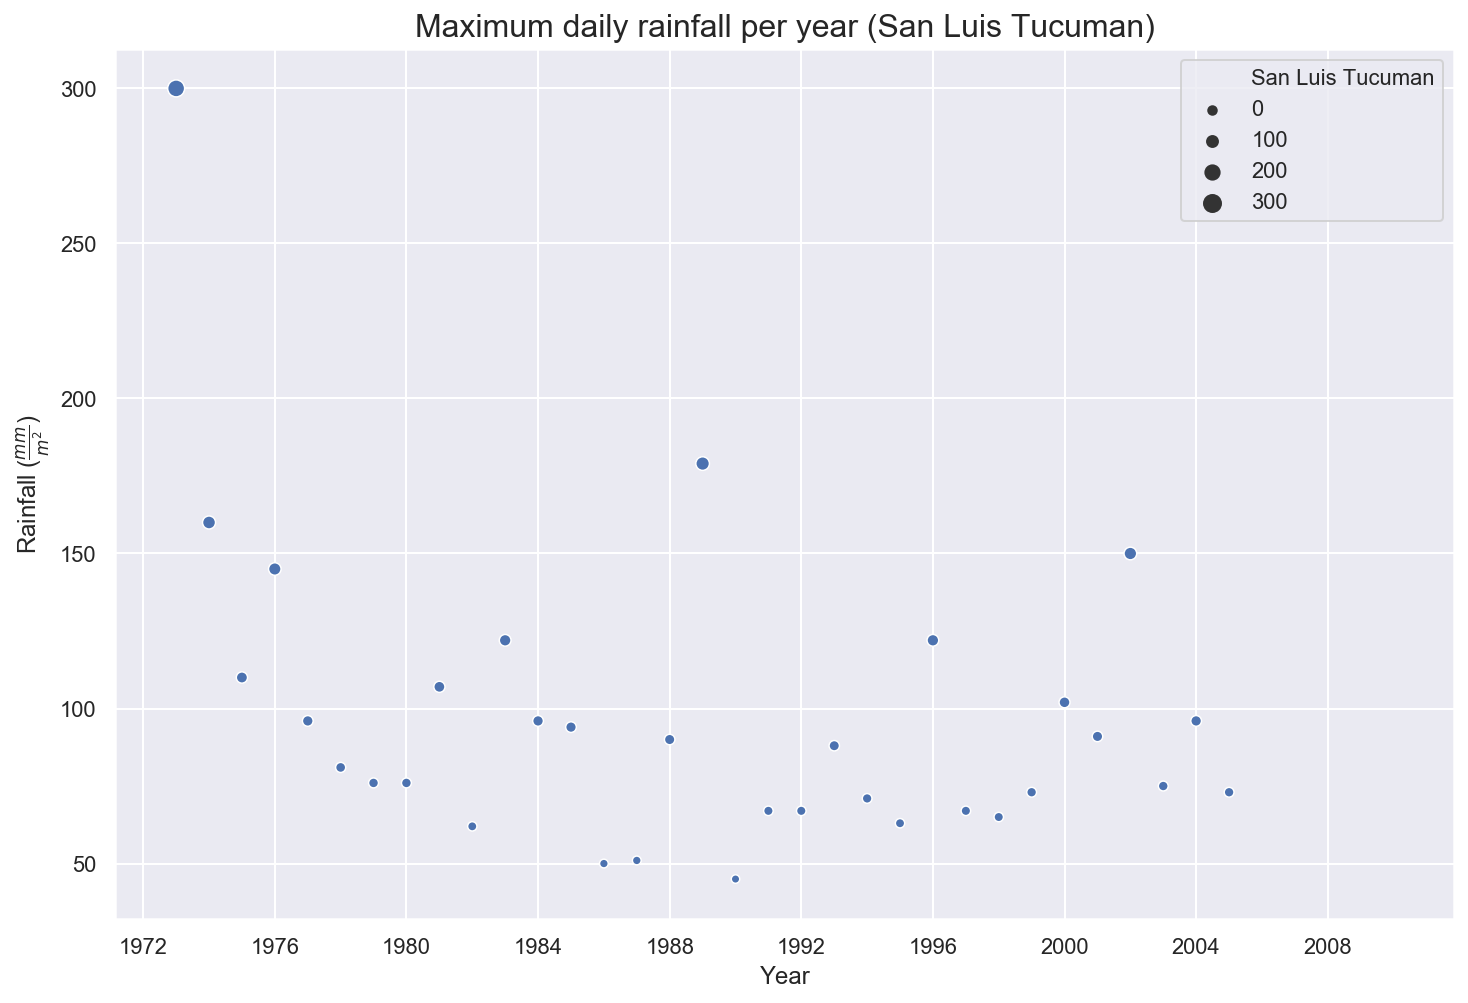

In [12]:
ax = sns.scatterplot(x='Año hid',
                     y='San Luis Tucuman',
                     size='San Luis Tucuman',
                     data=stations_maxima)
ax.set(xlabel='Year',
       ylabel='Rainfall ($\\frac{mm}{m^2}$)')
ax.set_title('Maximum daily rainfall per year (San Luis Tucuman)', fontsize=16);

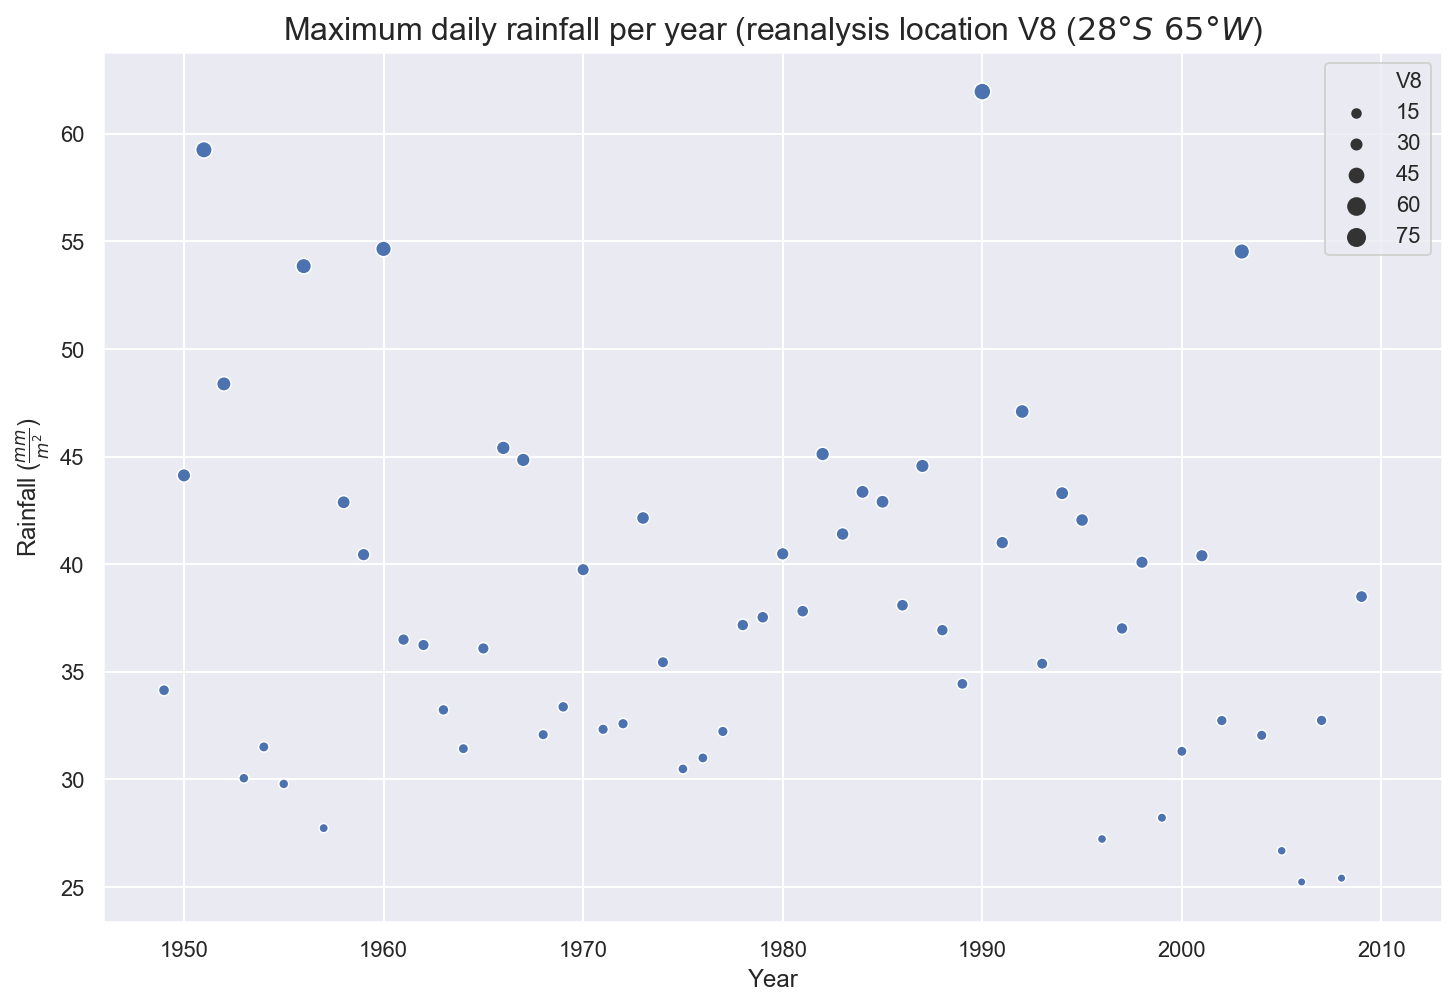

In [13]:
ax = sns.scatterplot(x='año',
                     y='V8',
                     size='V8',
                     data=reanalysis_maxima)
ax.set(xlabel='Year',
       ylabel='Rainfall ($\\frac{mm}{m^2}$)')
ax.set_title('Maximum daily rainfall per year (reanalysis location V8 ($28\\degree S \\ 65\\degree W$)', fontsize=16);

It's hard to say much about the series given how few points there are, so let's look at some summary statistics.

In [14]:
reanalysis_maxima['V8'].describe()

count    61.000000
mean     38.114413
std       8.046756
min      25.239077
25%      32.232370
50%      37.019585
75%      42.881099
max      61.964506
Name: V8, dtype: float64

In [15]:
stations_maxima['San Luis Tucuman'].describe()

count     33.000000
mean      97.272727
std       48.514993
min       45.000000
25%       67.000000
50%       88.000000
75%      107.000000
max      300.000000
Name: San Luis Tucuman, dtype: float64

In [16]:
slt_maxima = stations_maxima.loc[:, ['Año hid', 'San Luis Tucuman']].dropna().reset_index(drop=True)
beg, end = slt_maxima['Año hid'].min(), slt_maxima['Año hid'].max()

In [17]:
maxima_v8 = reanalysis_maxima.loc[:, ['año', 'V8']]
maxima_v8 = maxima_v8.query('año >= @beg & año <= @end').reset_index(drop=True)

In [18]:
df_maxima = maxima_v8
df_maxima.columns = ['year', 'model']
df_maxima['observed'] = slt_maxima['San Luis Tucuman']
df_maxima_tidy = df_maxima.melt(id_vars='year', var_name='type', value_name="rainfall")

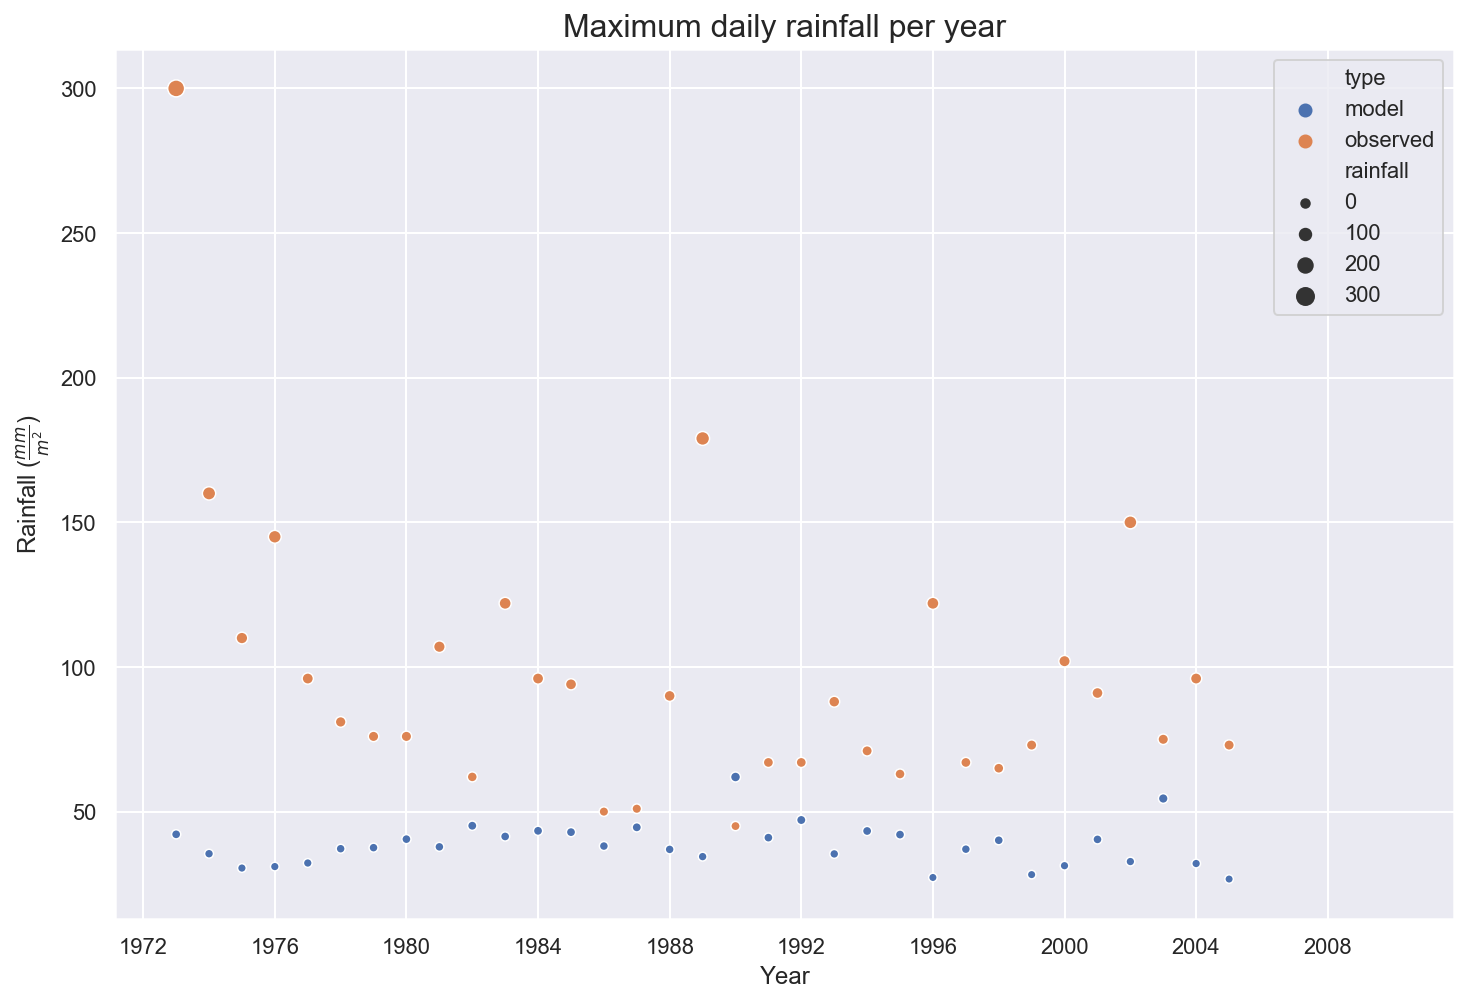

In [19]:
ax = sns.scatterplot(x='year', y='rainfall', hue='type', size='rainfall', data=df_maxima_tidy)
ax.set(xlabel='Year',
       ylabel='Rainfall ($\\frac{mm}{m^2}$)')
ax.set_title('Maximum daily rainfall per year', fontsize=16);

In [20]:
slt_annual = stations_annual.loc[:, ['Año hid', 'San Luis Tucuman']].dropna().reset_index(drop=True)
beg, end = slt_annual['Año hid'].min(), slt_annual['Año hid'].max()

In [21]:
annual_v8 = reanalysis_total.loc[:, ['año', 'V8']]
annual_v8 = annual_v8.query('año >= @beg & año <= @end').reset_index(drop=True)

In [22]:
df_annual = annual_v8
df_annual.columns = ['year', 'model']
df_annual['observed'] = slt_annual['San Luis Tucuman']
df_annual_tidy = df_annual.melt(id_vars='year', var_name='type', value_name="rainfall")

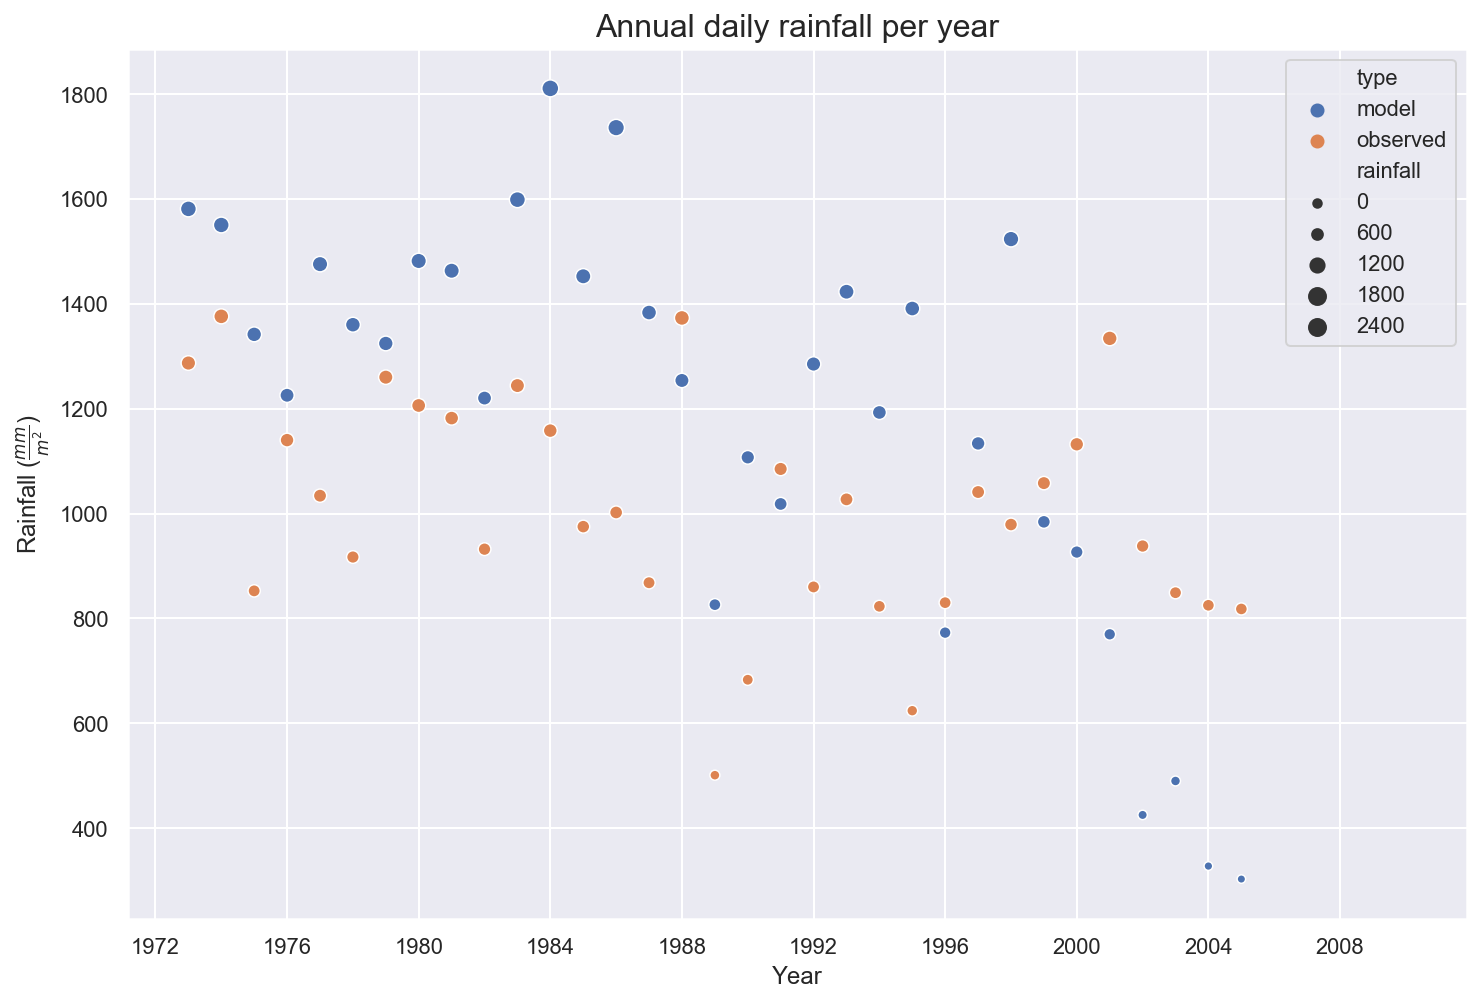

In [23]:
ax = sns.scatterplot(x='year', y='rainfall', hue='type', size='rainfall', data=df_annual_tidy)
ax.set(xlabel='Year',
       ylabel='Rainfall ($\\frac{mm}{m^2}$)')
ax.set_title('Annual daily rainfall per year', fontsize=16);

Let's now look at the [autocorrelation](https://otexts.com/fpp2/autocorrelation.html) and [partial autocorrelation](https://en.wikipedia.org/wiki/Partial_autocorrelation_function) plots, which might give us an idea of how reasonable an [Autoregressive model](https://en.wikipedia.org/wiki/Autoregressive_model) could be.

In [24]:
import statsmodels.api as sm

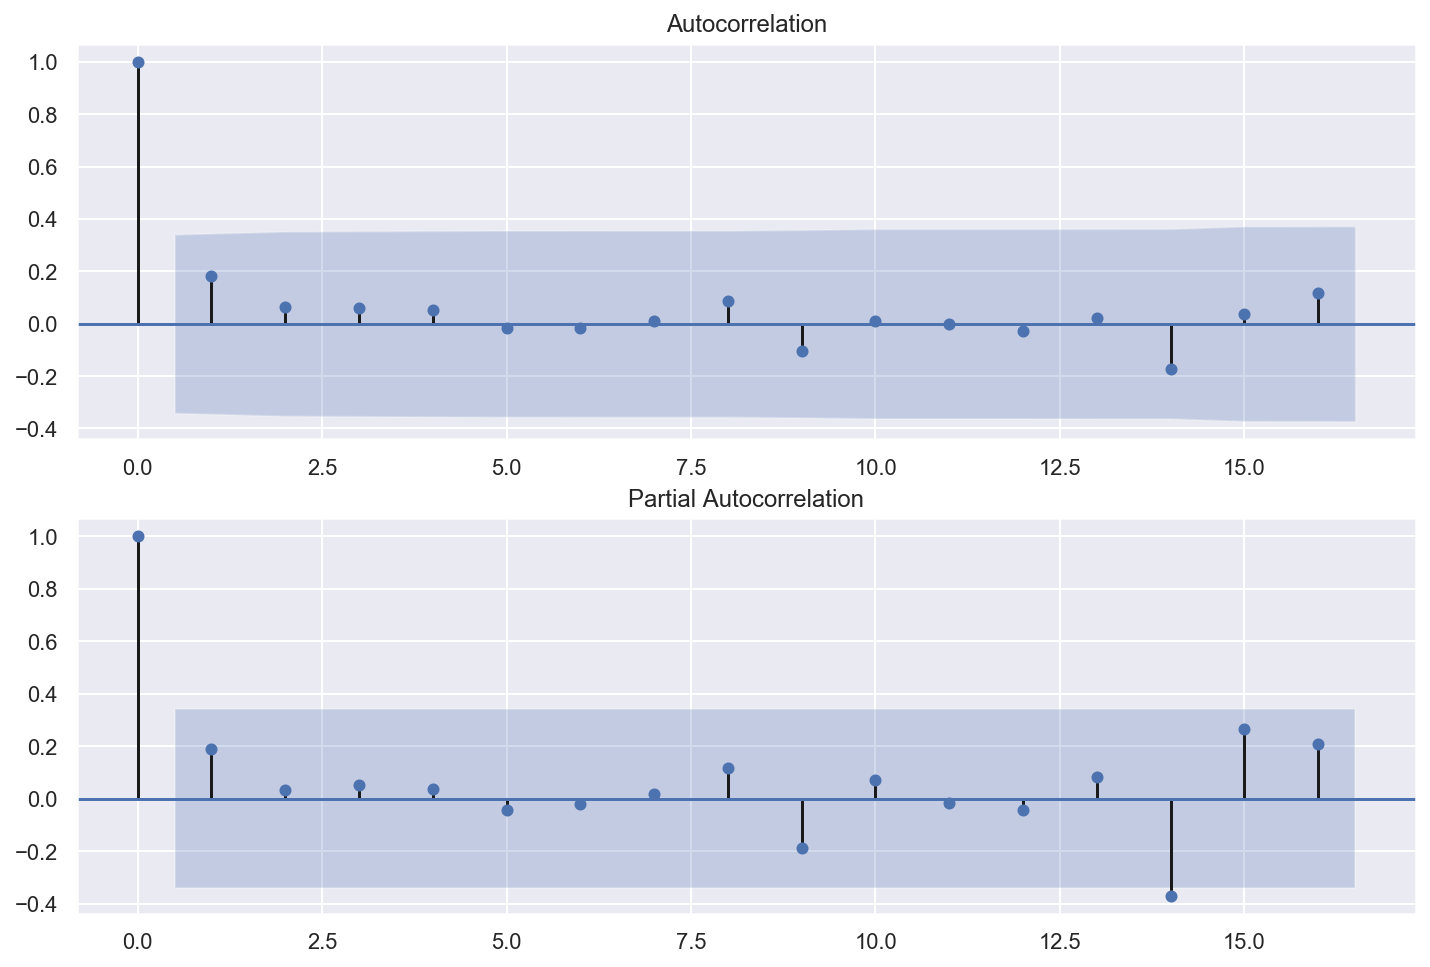

In [25]:
fig, (ax1, ax2) = plt.subplots(2)
sm.graphics.tsa.plot_acf(df_maxima['observed'], ax=ax1)
sm.graphics.tsa.plot_pacf(df_maxima['observed'], ax=ax2);

Again, the small sample size makes it hard to say something definitive, but the autocorrelation values are mostly low (which suggests some stationarity), though the partial autocorrelation values also being low at all lags means that an autoregressive method might be a poor choice. Nonetheless, we will still try out some in the next section.

## Time series methods (AR/ARIMA)

We first try to fit an [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) model using the `auto_arima` method from `pmdarima`.

In [26]:
stations_maxima_ = stations_maxima.set_index('Año hid')

In [27]:
maxima_sl_tucuman = stations_maxima_.truncate(before=pd.Timestamp('1973-01-01'))[['San Luis Tucuman']]

In [ ]:
import pmdarima as pmd

stepwise_fit = pmd.auto_arima(maxima_sl_tucuman, start_p=1, start_q=1,
                             max_p=3, max_q=3,
                             start_P=0, seasonal=False,
                             d=1, trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

In [29]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   32
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -167.730
Method:                       css-mle   S.D. of innovations             45.443
Date:                Fri, 28 Feb 2020   AIC                            341.460
Time:                        12:05:14   BIC                            345.857
Sample:                             1   HQIC                           342.918
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0059      3.852     -1.040      0.298     -11.556       3.544
ma.L1.D.y     -0.5710      0.215     -2.658      0.008      -0.992      -0.150
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.7514           +0.0000j            1.7514            0.0000
-----------------------------------------------------------------------------
"""

Notice how the best fit was a ARIMA(0,1,1), which means the series is differenced once, it has a moving average component but not an autoregressive one, consistent with how little autocorrelation we saw.

In [29]:
# ARIMA parameters
p = 0
d = 1
q = 1
# Number of predictions into the future
n = 10

In [30]:
model_arima = sm.tsa.statespace.SARIMAX(maxima_sl_tucuman.values, order=(p,d,q), seasonal=False)

In [31]:
fit = model_arima.fit()

In [32]:
prediction = fit.forecast(n)

We plot the ARIMA predictions for the next ten years.

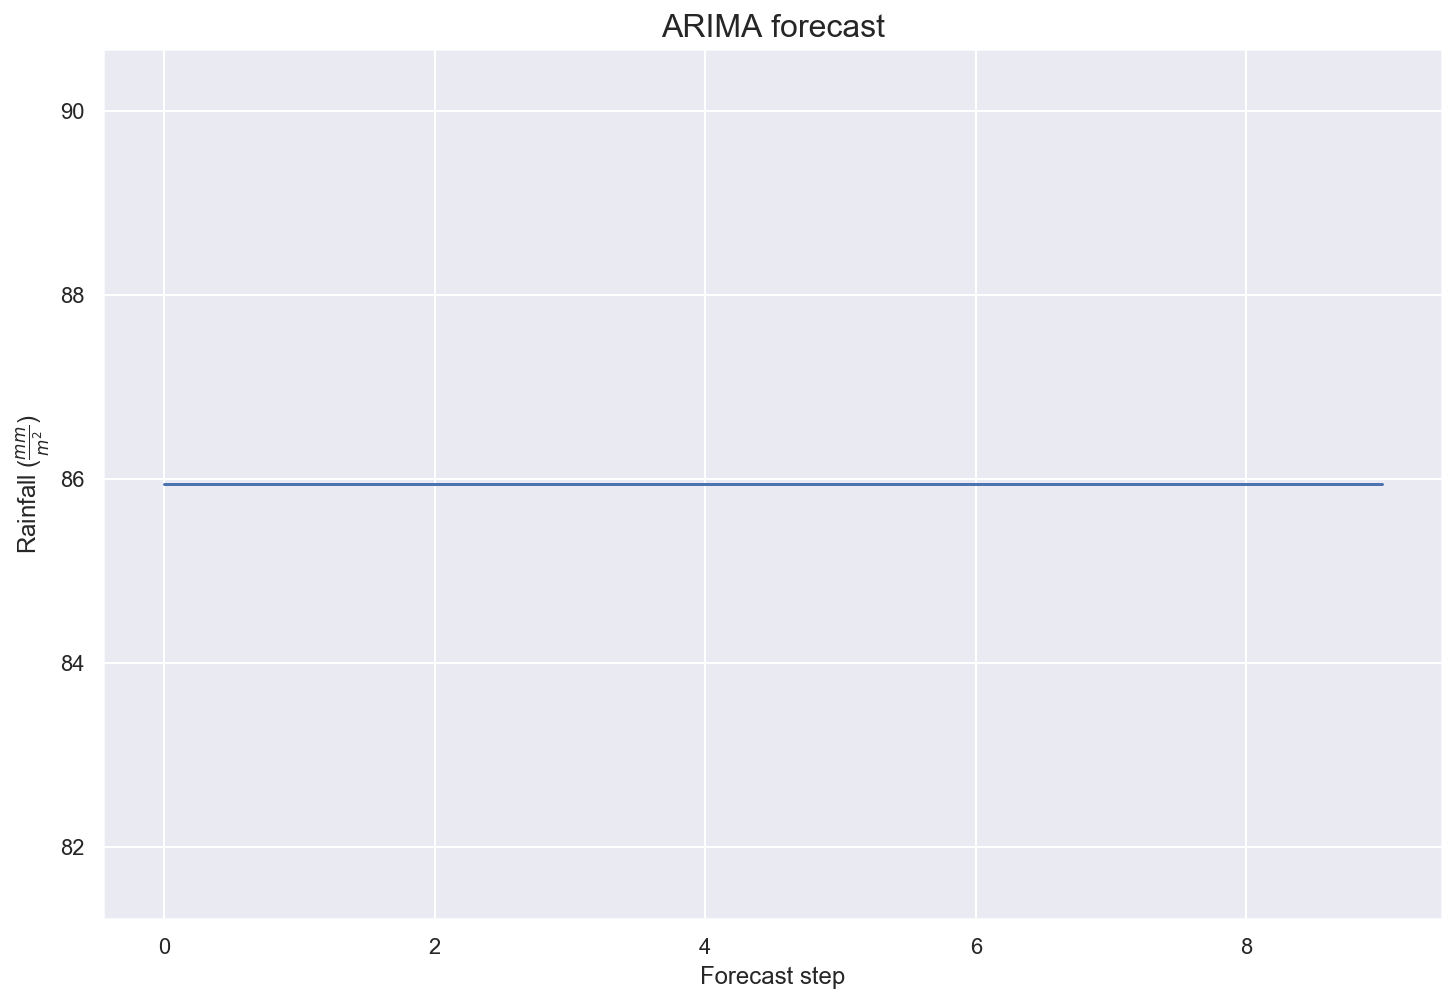

In [33]:
ax = pd.Series(prediction).plot()
ax.set(xlabel='Forecast step', ylabel='Rainfall ($\\frac{mm}{m^2}$)')
ax.set_title('ARIMA forecast', fontsize=16);

Now we fit an AR(1) and AR(2) methods to the series using bayesian inference (`pymc3`) to determine the value of the parameter(s).

In [34]:
import pymc3 as pm
import warnings

warnings.filterwarnings('ignore')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [phi_1]
Sampling 2 chains: 100%|██████████| 28000/28000 [00:08<00:00, 3169.34draws/s]
logp = -1.4881e+05, ||grad|| = 2.9917e+05: 100%|██████████| 5/5 [00:00<00:00, 965.27it/s]


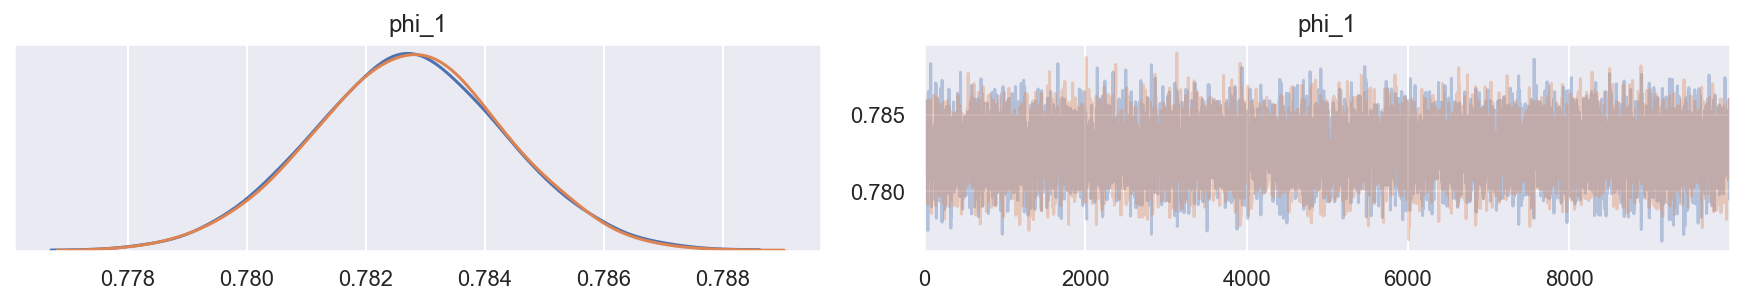

In [36]:
sigma = 1.0

with pm.Model() as ar1:
    phi1 = pm.StudentT('phi_1', nu=1, sigma=sigma)
    data = pm.AR('p', phi1, observed=maxima_sl_tucuman)
    trace = pm.sample(10000, tune=4000)
    map_ar1 = pm.find_MAP()

pm.traceplot(trace);

In [37]:
phi1_hat = map_ar1['phi_1']
phi1_hat

array(0.78267304)

In [38]:
steps = 10

last_day = maxima_sl_tucuman.index[-1]
last_value = maxima_sl_tucuman.loc[last_day, 'San Luis Tucuman']
forecast_period = pd.date_range(start=last_day + pd.DateOffset(years=1), periods=steps, freq='AS')

forecast = np.repeat(phi1_hat, steps).cumprod()
forecasts = pd.DataFrame({'forecast': last_value * forecast}, index=forecast_period)
forecast_df = maxima_sl_tucuman.append(forecasts, sort=True)

In [39]:
def plot_forecast(forecast_df, steps=10):
    ax = sns.lineplot(x=forecast_df.index[-2 * steps:-steps],
                      y=forecast_df['San Luis Tucuman'][-2 * steps:-steps],
                      label='Maximum daily rainfall',
                      marker='o',
                      alpha=0.7)
    sns.lineplot(x=forecast_df.index[-steps:],
                 y=forecast_df['forecast'][-steps:],
                 label='Forecast',
                 marker='o',
                 alpha=0.7,
                 ax=ax)
    
    for line in ax.lines:
        line.set_linestyle('--')

    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall ($\\frac{mm}{m^2}$)')
    ax.figure.autofmt_xdate()
    ax.set_title('Maximum daily rainfall (San Luis Tucuman)', fontsize=16)

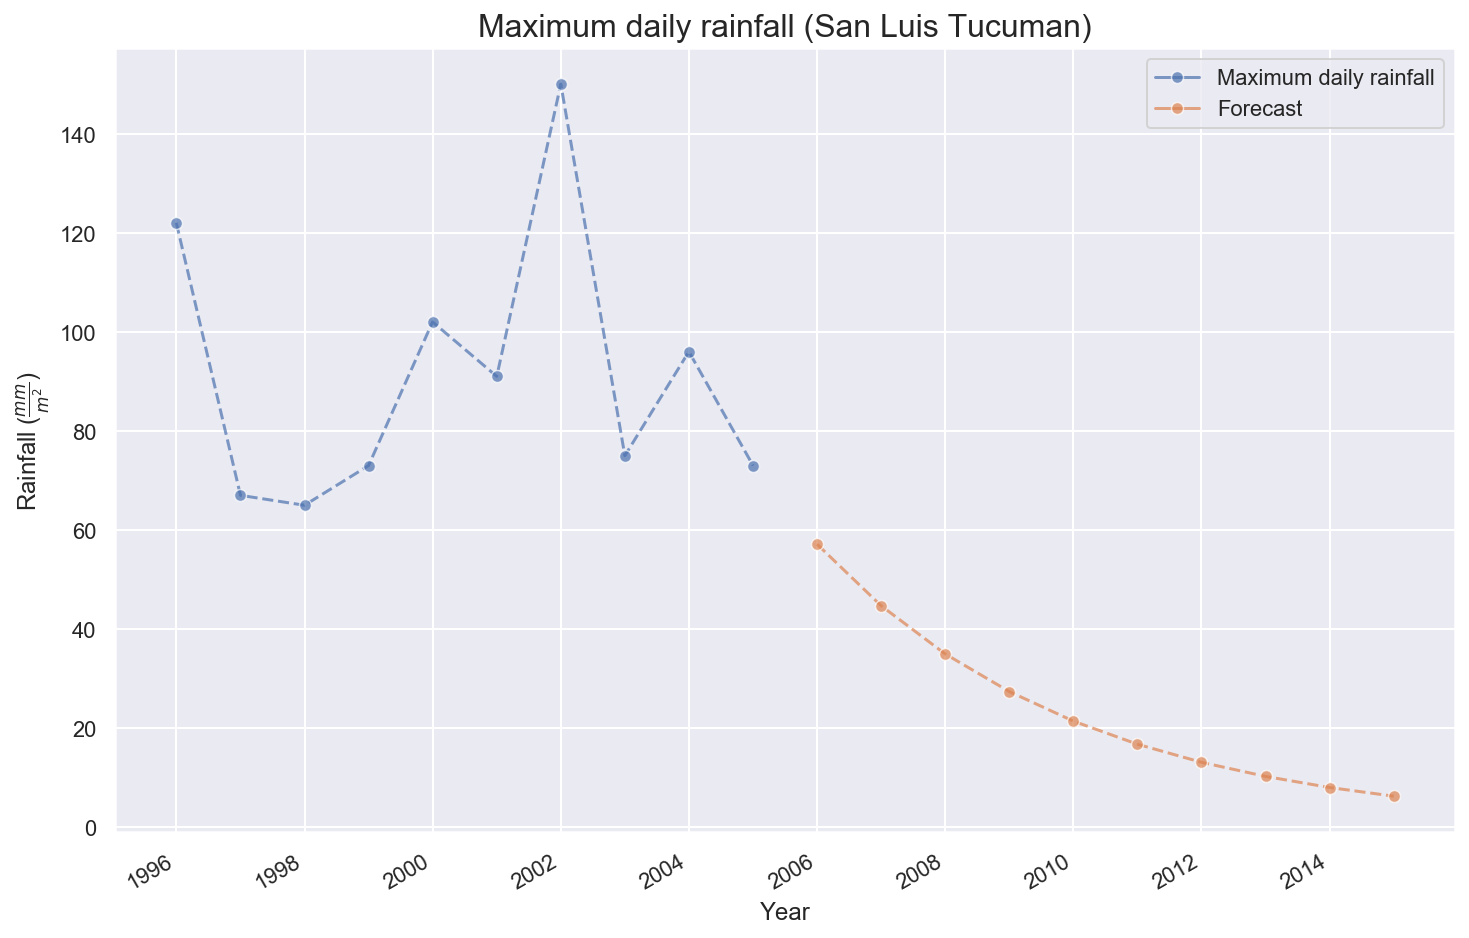

In [40]:
plot_forecast(forecast_df)

Because the best value found for the autoregressive parameter is significantly below 1, the forecasts quickly go down to zero. This is, of course, a very poor prediction; the series just does not seem to have an autoregressive component.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [phi_2, phi_1]
Sampling 2 chains: 100%|██████████| 28000/28000 [00:18<00:00, 1485.44draws/s]
The acceptance probability does not match the target. It is 0.8988010987280971, but should be close to 0.8. Try to increase the number of tuning steps.
logp = -1.3601e+05, ||grad|| = 3.7224e+05: 100%|██████████| 9/9 [00:00<00:00, 2325.58it/s]


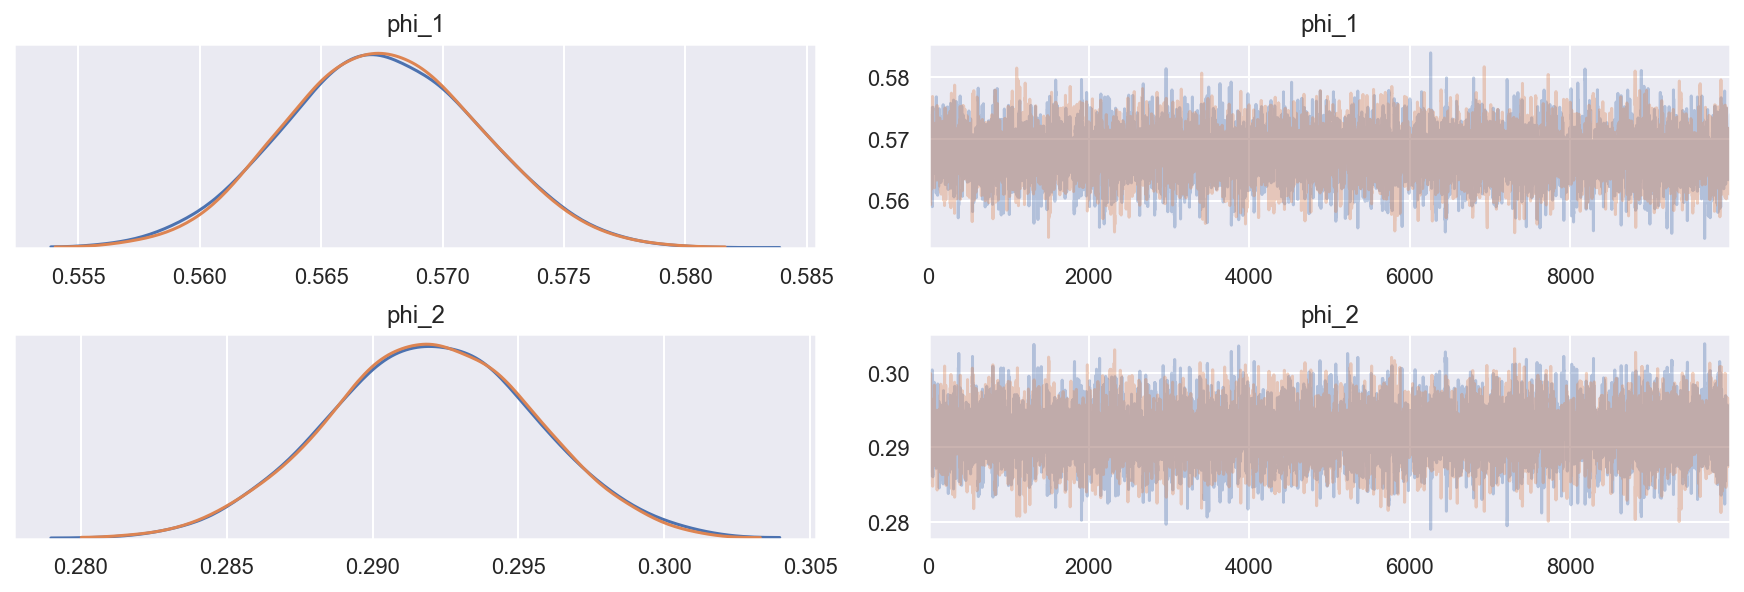

In [41]:
with pm.Model() as ar2:
    phi1 = pm.StudentT('phi_1', nu=1, sigma=sigma)
    phi2 = pm.StudentT('phi_2', nu=1, sigma=sigma)
    data = pm.AR('p', [phi1, phi2], observed=maxima_sl_tucuman['San Luis Tucuman'])
    trace = pm.sample(10000, tune=4000)
    map_ar2 = pm.find_MAP()

pm.traceplot(trace);

In [42]:
phi1_hat = map_ar2['phi_1']
phi2_hat = map_ar2['phi_2']

In [43]:
def ar2_process(steps, phis, last_values):
    current_values = last_values.copy()

    for i in range(steps):
        last, second_last, *rest = current_values
        next_value = phis[0] * last + phis[1] * second_last
        current_values = [next_value] + current_values
    
    return np.array(current_values[:-2])[::-1]

In [44]:
second_to_last_value = maxima_sl_tucuman['San Luis Tucuman'].values[-2]
forecast = ar2_process(steps, [phi1_hat, phi2_hat], [last_value, second_to_last_value])
forecasts = pd.DataFrame({'forecast': forecast},
                         index=forecast_period)
forecast_df = maxima_sl_tucuman.append(forecasts, sort=True)

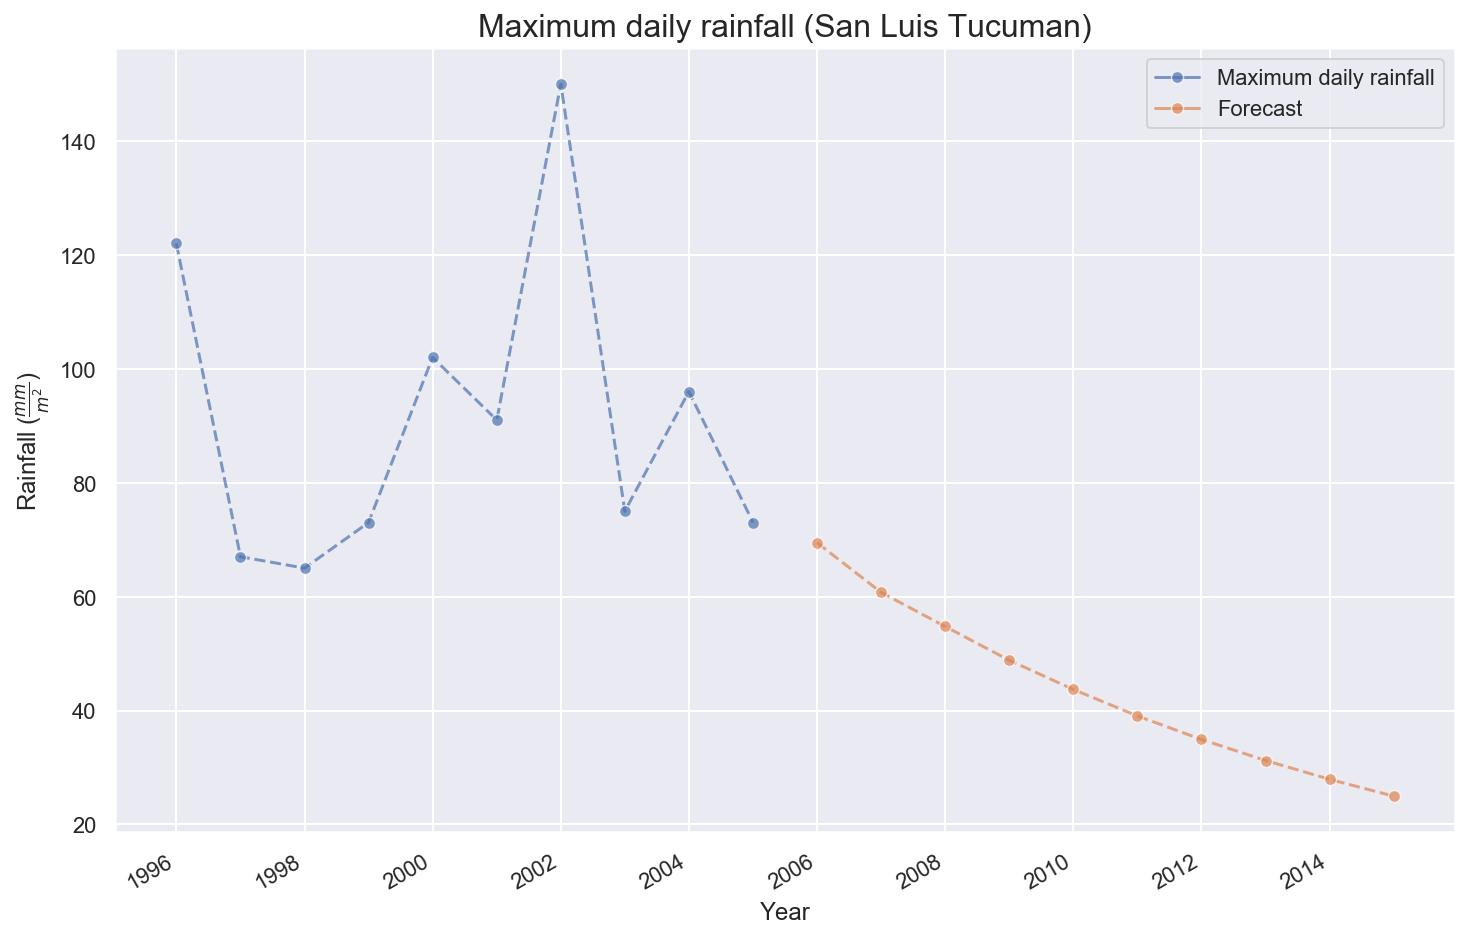

In [45]:
plot_forecast(forecast_df)

For the same reasons as the AR(1) method, this is just not a good prediction.

## LSTM Neural networks

A long short-term memory is a type of artificial neural network with a recurrent architecture, having feedback connections to keep track of long-term dependencies in the input sequences.

With the function *split_sequence* we generate the values $(x,y)$ to train the model, where each $x$ is a sequence of *n_steps* (in our case 10) values from the dataset and $y$ the next value to predict.

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM,Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Using TensorFlow backend.


In [47]:
def split_sequence(sequence, n_steps):
    X, y = list(), list() 
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [48]:
solutions = {}
for i in range(5):
    dataset = stations_maxima['San Luis Tucuman'].dropna().values[1:]
    n_features = 1
    n_steps = 10
    X, y = split_sequence(dataset, n_steps)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=200, verbose=0)
    x_ = np.array(dataset[-10:])
    y = []
    for j in range(10):   
        x_input = x_.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        x_ = np.append(x_[1:],yhat)
        y.append(yhat)
    solutions[i] = y

In [49]:
final_sol_1 = []
for i in range(10):
    mean = []
    for key in solutions.keys():
        
        mean.append(solutions[key][i][0][0])
    final_sol_1.append(np.mean(mean))

In [50]:
rain_forecats = np.append(stations_maxima['San Luis Tucuman'].dropna().values[:-1], final_sol_1)

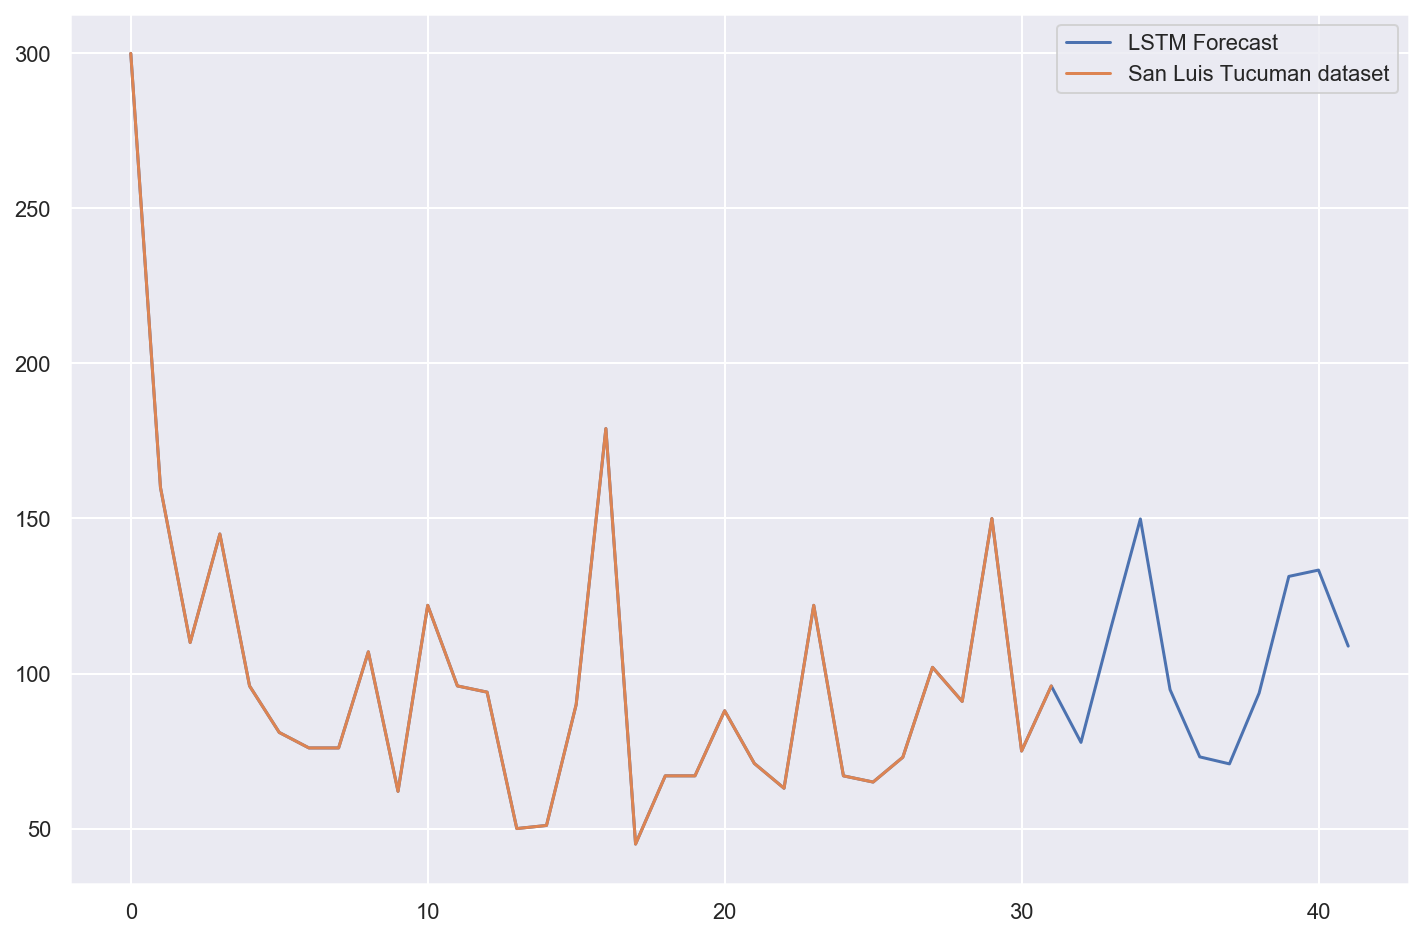

In [51]:
plt.plot(rain_forecats, label='LSTM Forecast')
plt.plot(stations_maxima['San Luis Tucuman'].dropna().values[:-1], label='San Luis Tucuman dataset' )
plt.legend();

Then we use the same model but the last value of the time series is taken as test set, and we fit the model until minimum loss in the test set, weighting the final solution with the normalized inverse of this loss

In [52]:
solutions = {}
losses = []
for i in range(20):
    dataset = stations_maxima['San Luis Tucuman'].dropna().values[:-1]
    x_val = stations_maxima['San Luis Tucuman'].dropna().values[-11:-1]
    y_val = stations_maxima['San Luis Tucuman'].dropna().values[-1]
    n_features = 1
    n_steps = 10
    X, y = split_sequence(dataset, n_steps)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    X_val = x_val.reshape((1, n_steps, n_features))
    es = EarlyStopping(monitor='val_loss',
                                  min_delta=0,
                                  patience=3,
                                  verbose=0, mode='auto')
    mc = ModelCheckpoint("best_model" + str(i) + ".h5", monitor='val_loss', mode='min', save_best_only=True)
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    history_callback = model.fit(X, y, callbacks = [es, mc], epochs=200, verbose=0, validation_data = (X_val, [y_val]))
    loss_history = history_callback.history["val_loss"]

    modelo = Sequential()
    modelo.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    modelo.add(LSTM(50, activation='relu'))
    modelo.add(Dense(1))
    modelo.compile(optimizer='adam', loss='mse')
    modelo.load_weights("best_model" + str(i) + ".h5")
    sol = [] 
    x_ = stations_maxima['San Luis Tucuman'].dropna().values[-10:]

    losses.append(loss_history[-4])
    for j in range(10):   
            x_input = x_.reshape((1, n_steps, n_features))
            yhat = modelo.predict(x_input, verbose=0)
            x_ = np.append(x_[1:],yhat)
            sol.append(yhat)
    solutions[i] = sol

In [53]:
sol = [] 
x_ = stations_maxima['San Luis Tucuman'].dropna().values[-10:]
for j in range(10):   
        x_input = x_.reshape((1, n_steps, n_features))
        yhat = modelo.predict(x_input, verbose=0)
        x_ = np.append(x_[1:],yhat)
        sol.append(yhat)

In [54]:
inv_losses = [1/i for i in losses]

In [55]:
factor = [i/sum(inv_losses) for i in inv_losses]

In [56]:
final_sol_2 = []
for i in range(10):
    sol_suma = 0
    for key in solutions.keys():
        
        sol_suma+= solutions[key][i][0][0]*factor[key]
        #print(factor[key])
    final_sol_2.append(sol_suma)

In [57]:
final_sol_2 = []
for i in range(10):
    sol_suma = 0
    for key in solutions.keys():
        
        sol_suma+= solutions[key][i][0][0]*factor[key]
        #print(factor[key])
    final_sol_2.append(sol_suma)

In [58]:
rain_forecats_2 = np.append(stations_maxima['San Luis Tucuman'].dropna().values[:-1], final_sol_2)

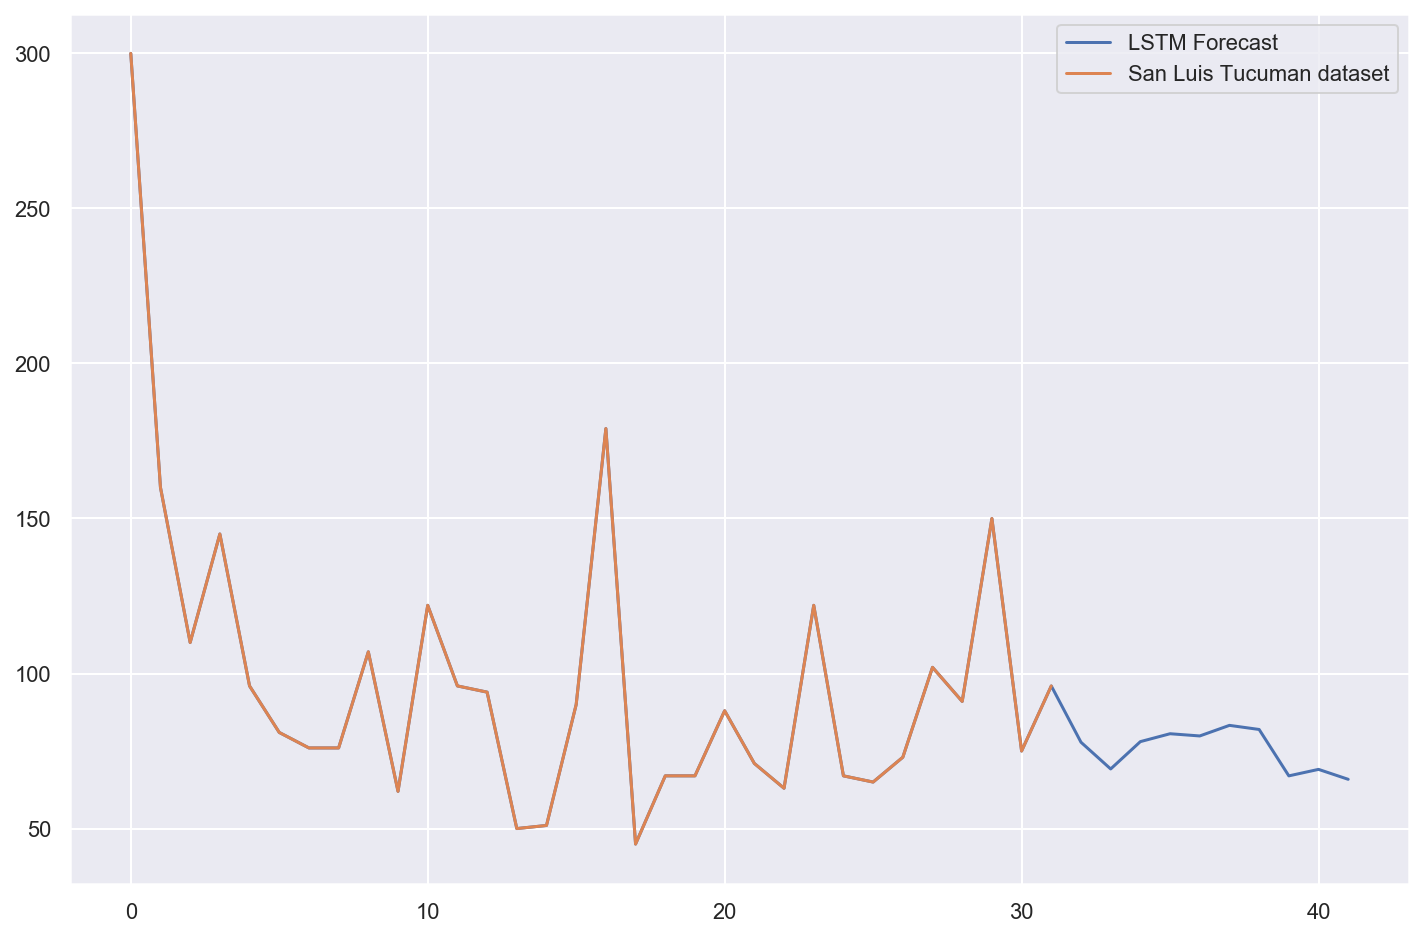

In [59]:
plt.plot(rain_forecats_2, label='LSTM Forecast')
plt.plot(stations_maxima['San Luis Tucuman'].dropna().values[:-1], label='San Luis Tucuman dataset' )
plt.legend();

We can also try a **bidirectional LSTM**. The main idea of this kind of recurrent neural network is to extract and learn patterns from the input sequence forward and backwards, using this information to predict future values.

In [60]:
dataset = stations_maxima['San Luis Tucuman'].dropna().values[:-3]

n_features = 1
n_steps = 10
X, y = split_sequence(dataset, n_steps)
X_val, y_val = split_sequence(stations_maxima['San Luis Tucuman'].dropna().values[-13:], n_steps)
X = X.reshape((X.shape[0], X.shape[1], n_features))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
es = EarlyStopping(monitor='val_loss',
                                  min_delta=0,
                                  patience=10,
                                  verbose=0, mode='auto')
mc = ModelCheckpoint("best_model_3test.h5", monitor='val_loss', mode='min', save_best_only=True)
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history_callback = model.fit(X, y, epochs=200, verbose=0, validation_data = (X_val, y_val))
loss_history = history_callback.history["val_loss"]

modelo = Sequential()
modelo.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
modelo.add(LSTM(50, activation='relu'))
modelo.add(Dense(1))
modelo.compile(optimizer='adam', loss='mse')
modelo.load_weights("best_model" + str(i) + ".h5")

## Supplementary datasets

We were able to find historical daily rainfall data for all argentine [SMN](https://www.smn.gob.ar) weather stations from the [GHCN](https://www.ncdc.noaa.gov/ghcn-daily-description) (Global Historical Climatology Network), an integrated database of daily climate summaries from land surface stations across the globe. 
Our hope is to reconstruct daily rainfall distributions for stations geographically near our target (San Luis Tucuman) to get a grasp of the magnitude of yearly maxima.

Some data munging follows, in which  we concatenate each part of the dataset into a single file.

In [ ]:
# import os

# dfs = []
# for file in os.listdir('data/GHCN-daily/'):
#     df = pd.read_csv('data/GHCN-daily/' + file, parse_dates=['DATE'])
#     dfs.append(df)
    
# merged = pd.concat(dfs, ignore_index=True, sort=False)
# merged.to_csv('data/GHCN-daily/precipitation_ar.csv', index=False)

### Exploratory analysis

In [35]:
daily_precipitation = pd.read_csv('data/GHCN-daily/precipitation_ar.csv', parse_dates=['DATE'], index_col=['DATE'])
daily_precipitation.head()

STATION                NAME  LATITUDE  LONGITUDE  ELEVATION  \
DATE                                                                          
1975-05-26  ARM00087550  NUEVE DE JULIO, AR    -35.45    -60.883       76.0   
1975-05-28  ARM00087550  NUEVE DE JULIO, AR    -35.45    -60.883       76.0   
1975-08-12  ARM00087550  NUEVE DE JULIO, AR    -35.45    -60.883       76.0   
1975-09-26  ARM00087550  NUEVE DE JULIO, AR    -35.45    -60.883       76.0   
1975-10-09  ARM00087550  NUEVE DE JULIO, AR    -35.45    -60.883       76.0   

            PRCP  
DATE              
1975-05-26   NaN  
1975-05-28   NaN  
1975-08-12   NaN  
1975-09-26   NaN  
1975-10-09   NaN

Observed precipitation levels are in **PRCP** column, measured in $\frac{dm}{m^2}$ (tens of $\frac{mm}{m^2}$).  
We will transform them to the standard $\frac{mm}{m^2}$.

In [36]:
daily_precipitation['PRCP'] *= 10

Let us visualize our stations on the map of Argentina.

In [37]:
import folium

In [38]:
argentine_map = folium.Map(location=[-35, -60], zoom_start=5)
stations = daily_precipitation.groupby('STATION').first().reset_index()

for station, group in daily_precipitation.groupby('STATION'):
    _station, name, lat, lon, *_ = group.iloc[0]
    
    mark = folium.Marker(location=[lat, lon], tooltip=name, popup=group.describe().to_html())
    mark.add_to(argentine_map)

In [39]:
argentine_map

Next, we'll have a closer look at the stations in the Argentine Northwest ([NOA](https://en.wikipedia.org/wiki/Argentine_Northwest)) region.

In [40]:
noa_stations = daily_precipitation.query('LATITUDE > -32 & LONGITUDE < -62')
noa_stations

STATION               NAME  LATITUDE  LONGITUDE  ELEVATION  \
DATE                                                                         
1973-06-18  ARM00087320  CHAMICAL AERO, AR   -30.367    -66.283      461.0   
1973-06-27  ARM00087320  CHAMICAL AERO, AR   -30.367    -66.283      461.0   
1973-09-01  ARM00087320  CHAMICAL AERO, AR   -30.367    -66.283      461.0   
1973-09-09  ARM00087320  CHAMICAL AERO, AR   -30.367    -66.283      461.0   
1973-09-13  ARM00087320  CHAMICAL AERO, AR   -30.367    -66.283      461.0   
...                 ...                ...       ...        ...        ...   
2020-02-12  ARM00087311       SAN JUAN, AR   -31.571    -68.418      597.1   
2020-02-13  ARM00087311       SAN JUAN, AR   -31.571    -68.418      597.1   
2020-02-14  ARM00087311       SAN JUAN, AR   -31.571    -68.418      597.1   
2020-02-15  ARM00087311       SAN JUAN, AR   -31.571    -68.418      597.1   
2020-02-16  ARM00087311       SAN JUAN, AR   -31.571    -68.418      597.1   

            PRCP  
DATE              
1973-06-18   0.0  
1973-06-27   0.0  
1973-09-01   0.0  
1973-09-09   0.0  
1973-09-13   0.0  
...          ...  
2020-02-12   NaN  
2020-02-13   NaN  
2020-02-14   NaN  
2020-02-15   NaN  
2020-02-16   NaN  

[291817 rows x 6 columns]

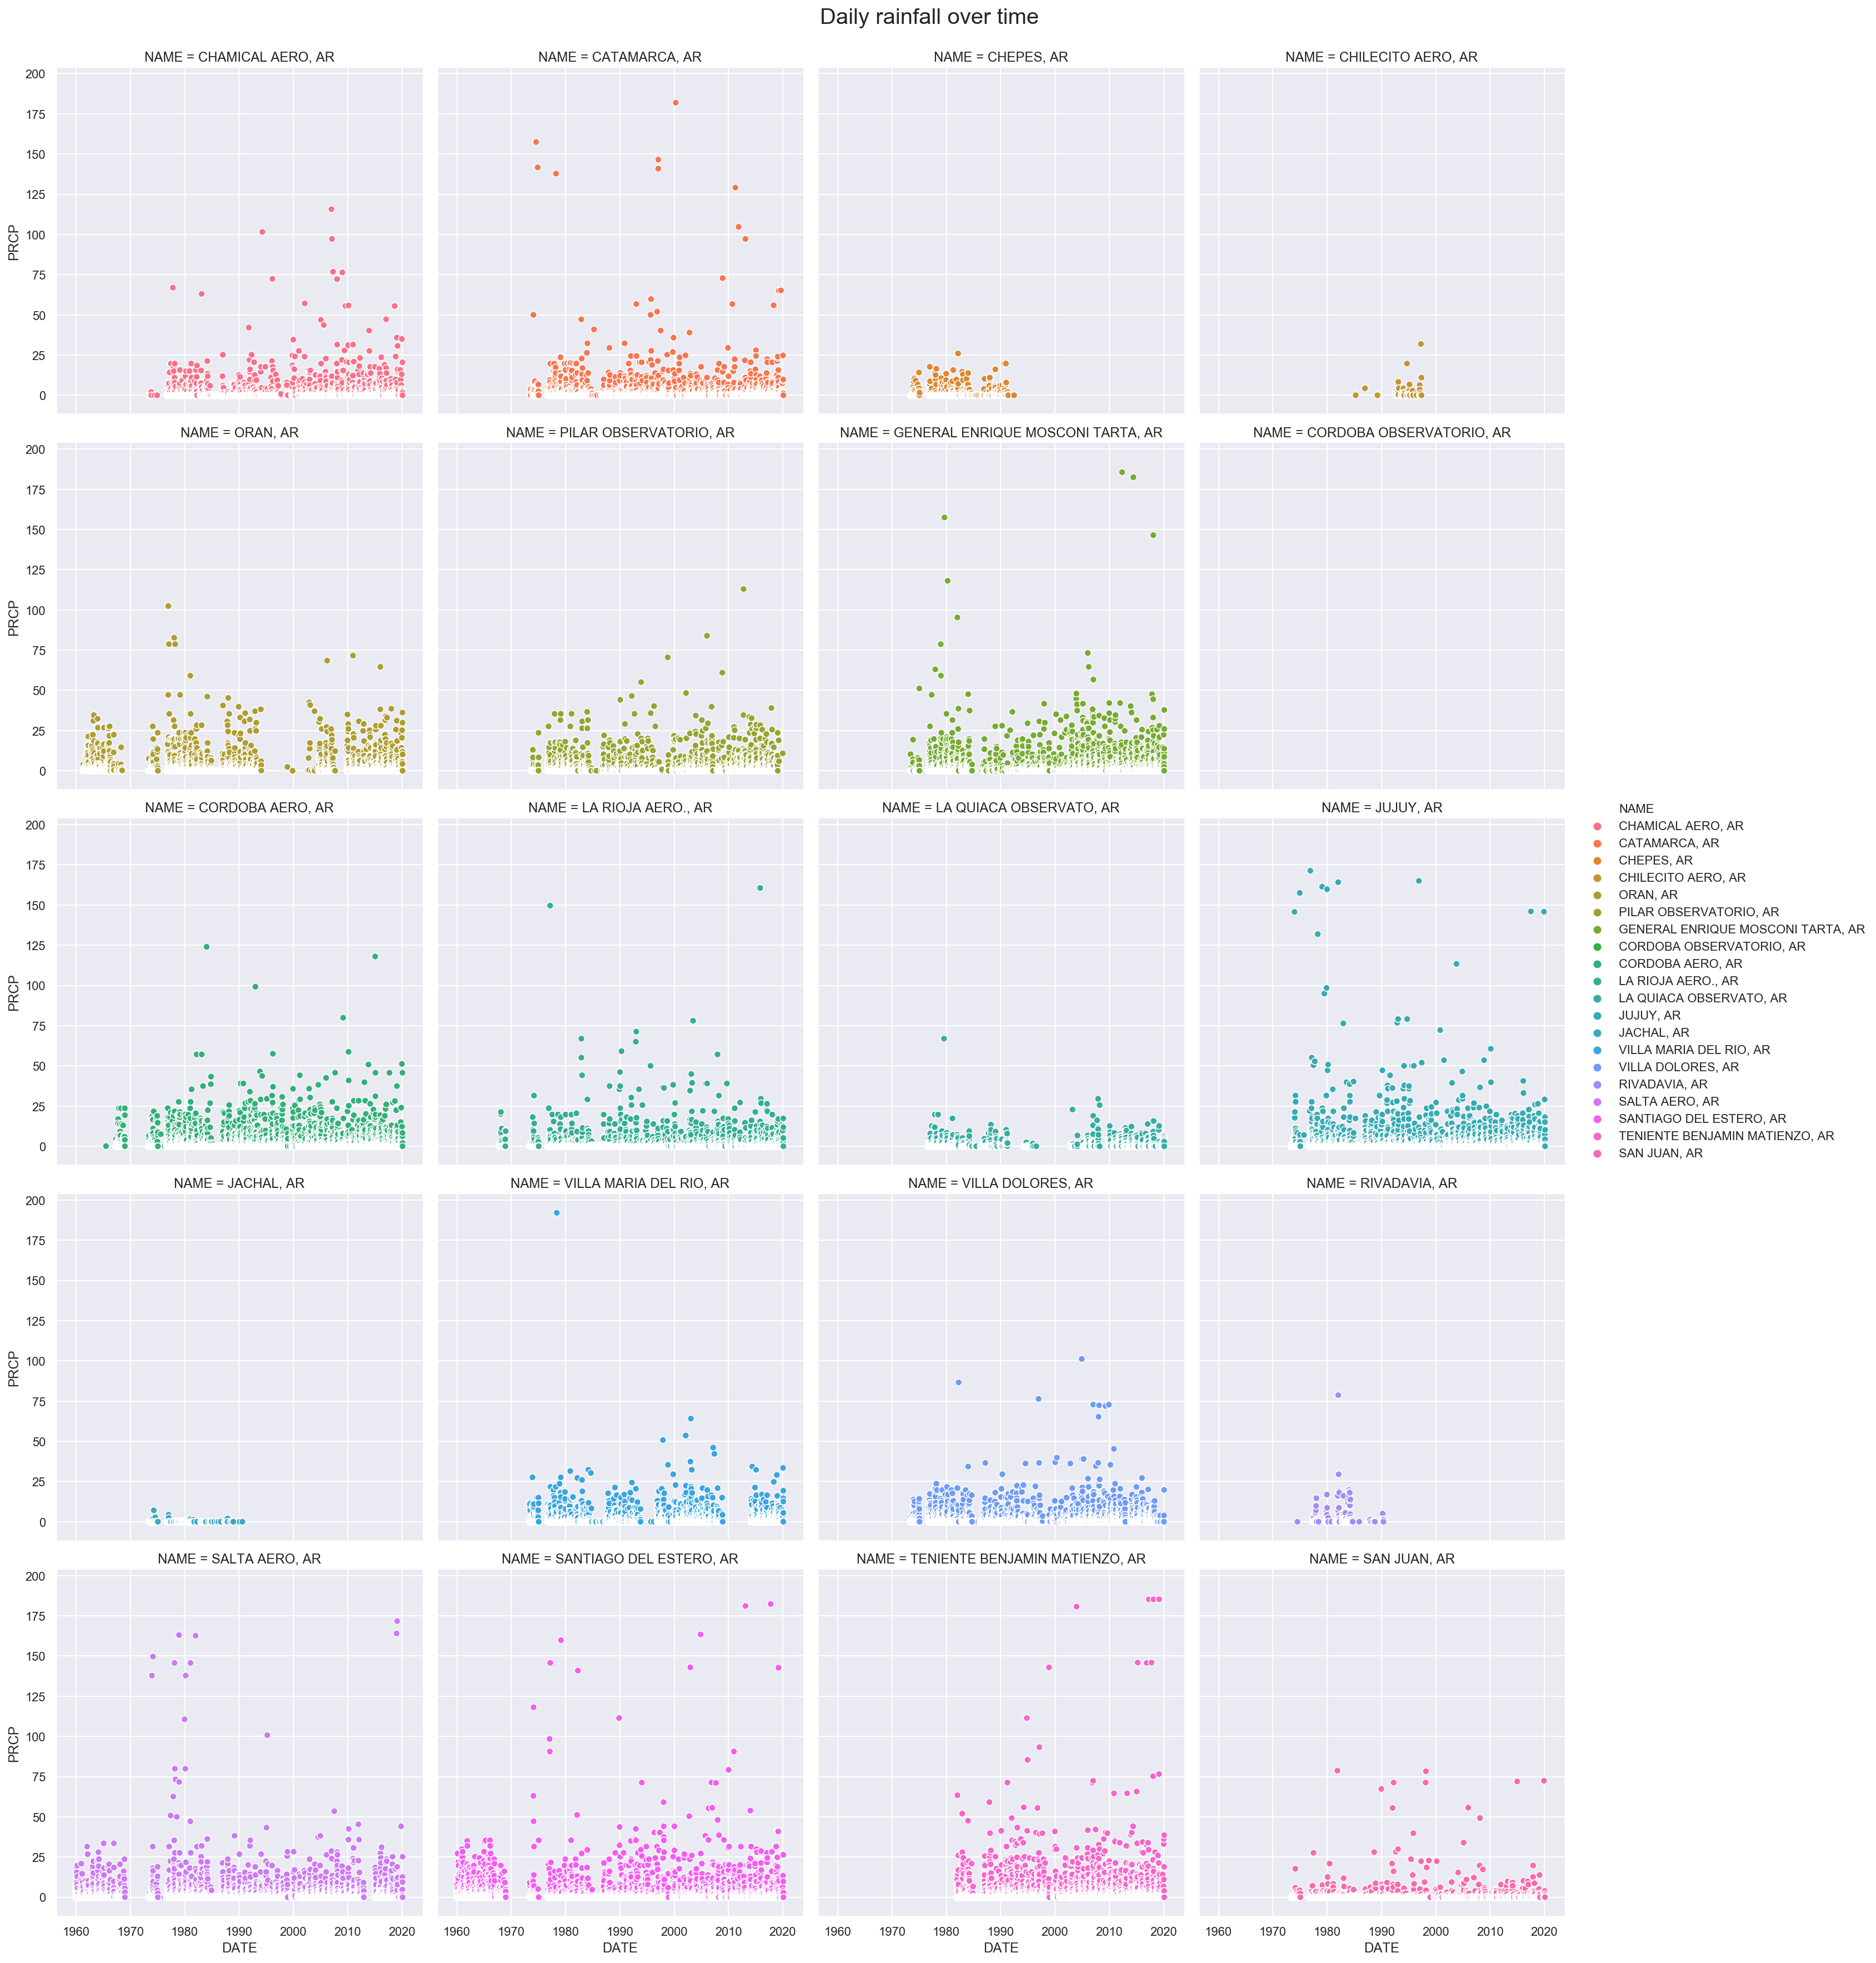

In [41]:
g = sns.relplot(x='DATE', y='PRCP', col='NAME', hue='NAME', col_wrap=4, data=noa_stations.reset_index())
g.fig.suptitle('Daily rainfall over time', size=20)
g.fig.subplots_adjust(top=.95);

We can see most stations in the region have historical data going back to the 70's, with a few with sparse/missing data.

Let's plot them on a map and also add the weather stations provided in the official dataset.

In [42]:
noa_map = folium.Map(location=[-28, -65], zoom_start=5, width=600, height=500)

for station, group in noa_stations.groupby('STATION'):
    _station, name, lat, lon, *_ = group.iloc[0]
    
    mark = folium.Marker(location=[lat, lon], tooltip=name, popup=group.describe().to_html())
    mark.add_to(noa_map)
    
# We add to the map the stations from the competition dataset
for idx, (estacion, _prov, _org, coordenadas, *_) in stations_info.iterrows():
    lat, lon = coordenadas.split(',')
    marker = folium.Marker(location=[-float(lat), -float(lon)], tooltip=station, icon=folium.Icon(color='red'))
    marker.add_to(noa_map)

In [43]:
noa_map

If we zoom in the province of Tucumán, we see that the closest station to our target is _Teniente Benjamín Matienzo_, located at the airport of San Miguel de Tucumán, slightly over 100 km away from the target station _San Luis Tucumán_.

In [44]:
tucuman_airport = noa_stations.query('NAME == "TENIENTE BENJAMIN MATIENZO, AR"')

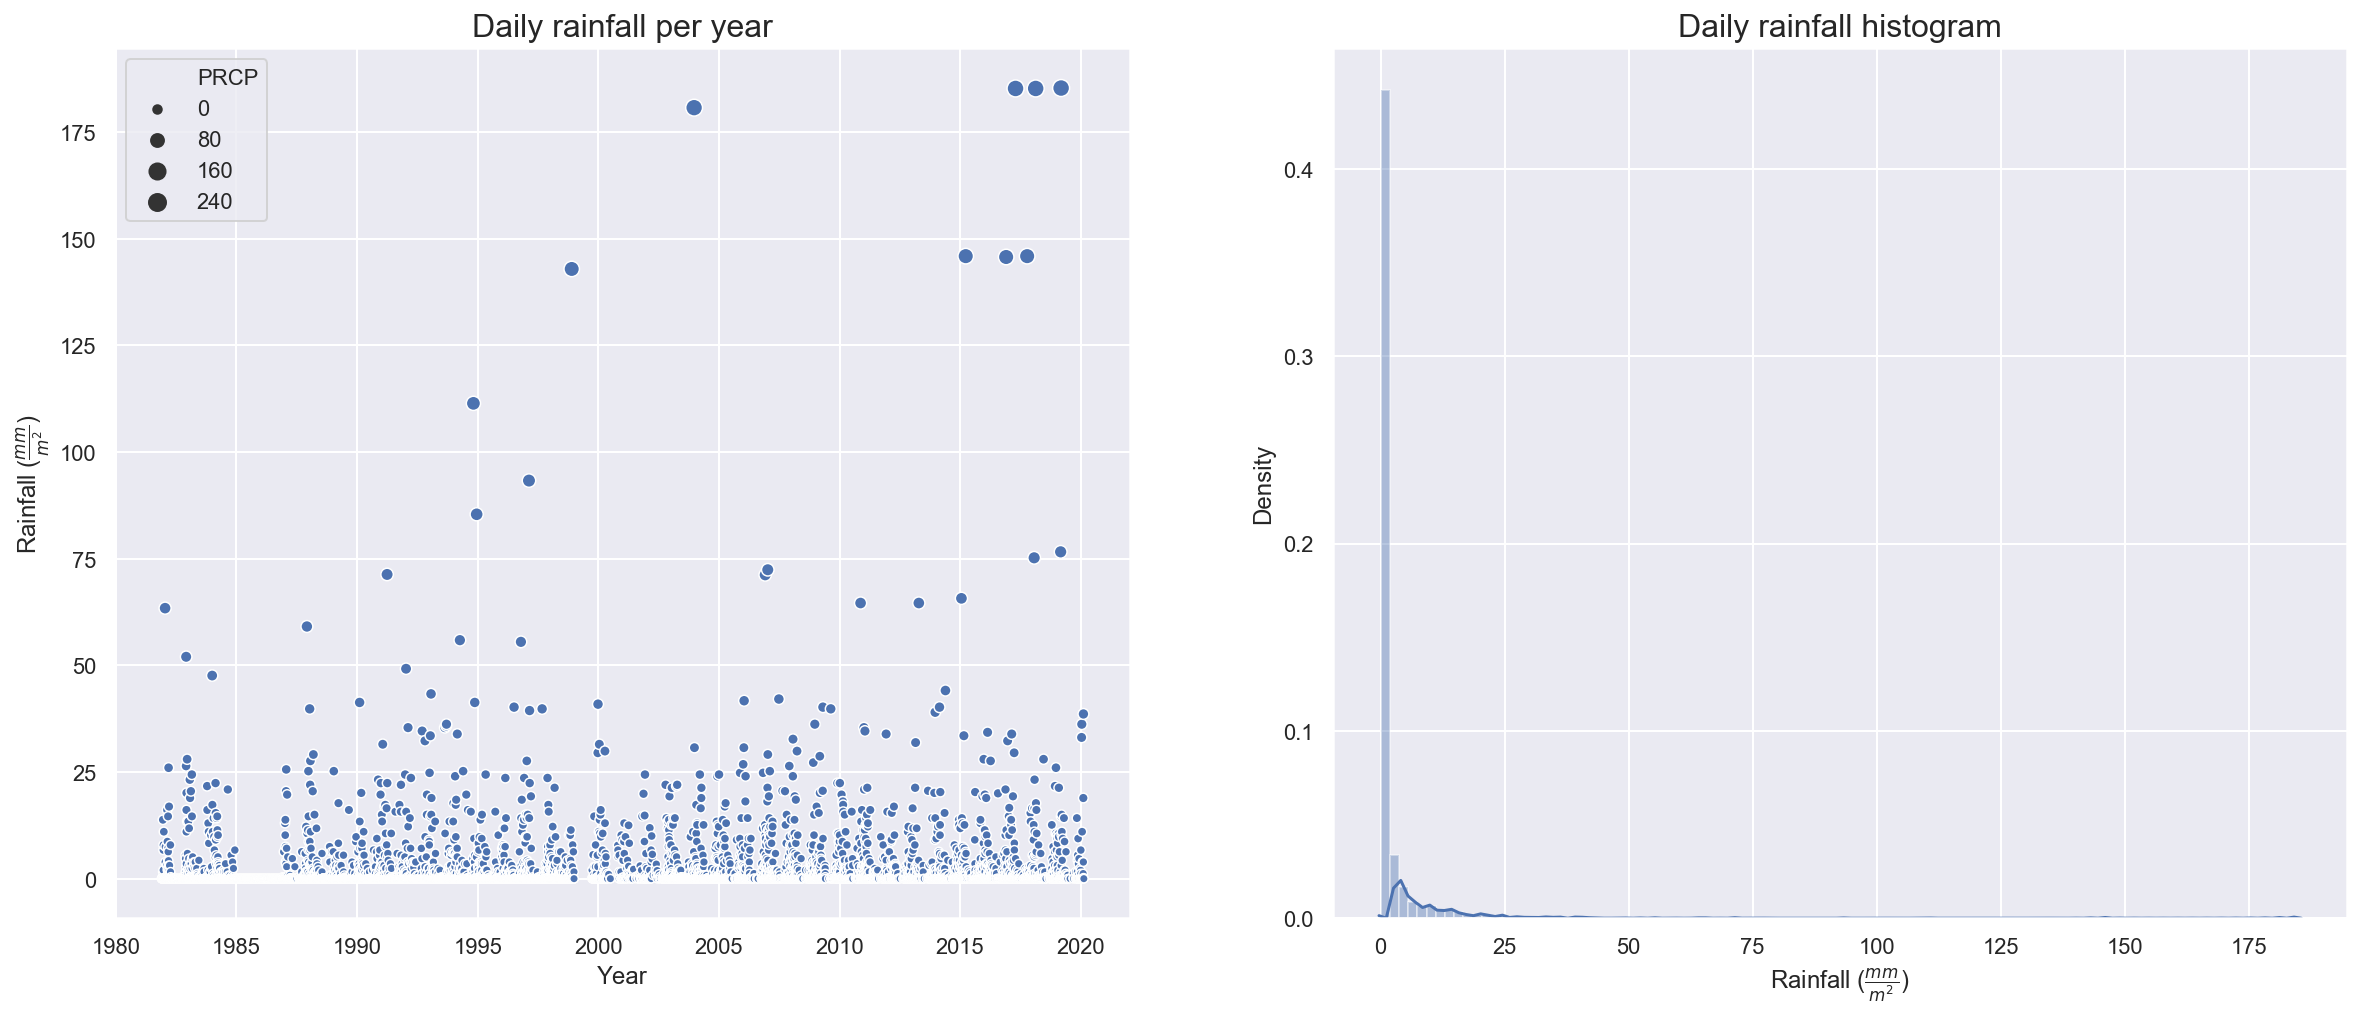

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax = sns.scatterplot(x='DATE', y='PRCP', size='PRCP', data=tucuman_airport.reset_index(), ax=ax1)
ax1.set(xlabel='Year',
       ylabel='Rainfall ($\\frac{mm}{m^2}$)')
ax1.set_title('Daily rainfall per year', fontsize=16);

sns.distplot(tucuman_airport['PRCP'], bins=100, ax=ax2)
ax2.set(xlabel='Rainfall ($\\frac{mm}{m^2}$)', ylabel='Density')
ax2.set_title('Daily rainfall histogram', fontsize=16);

As expected, most days have no or very low rainfall measurements.  
We also know that rainfall level depends strongly on the season, which we cannot visualize from these plots. We will resample the data by month, taking the total rainfall, and then calculate the mean for each month across all years in the dataset.

In [46]:
tucu_monthly_total = tucuman_airport.resample('M').sum()

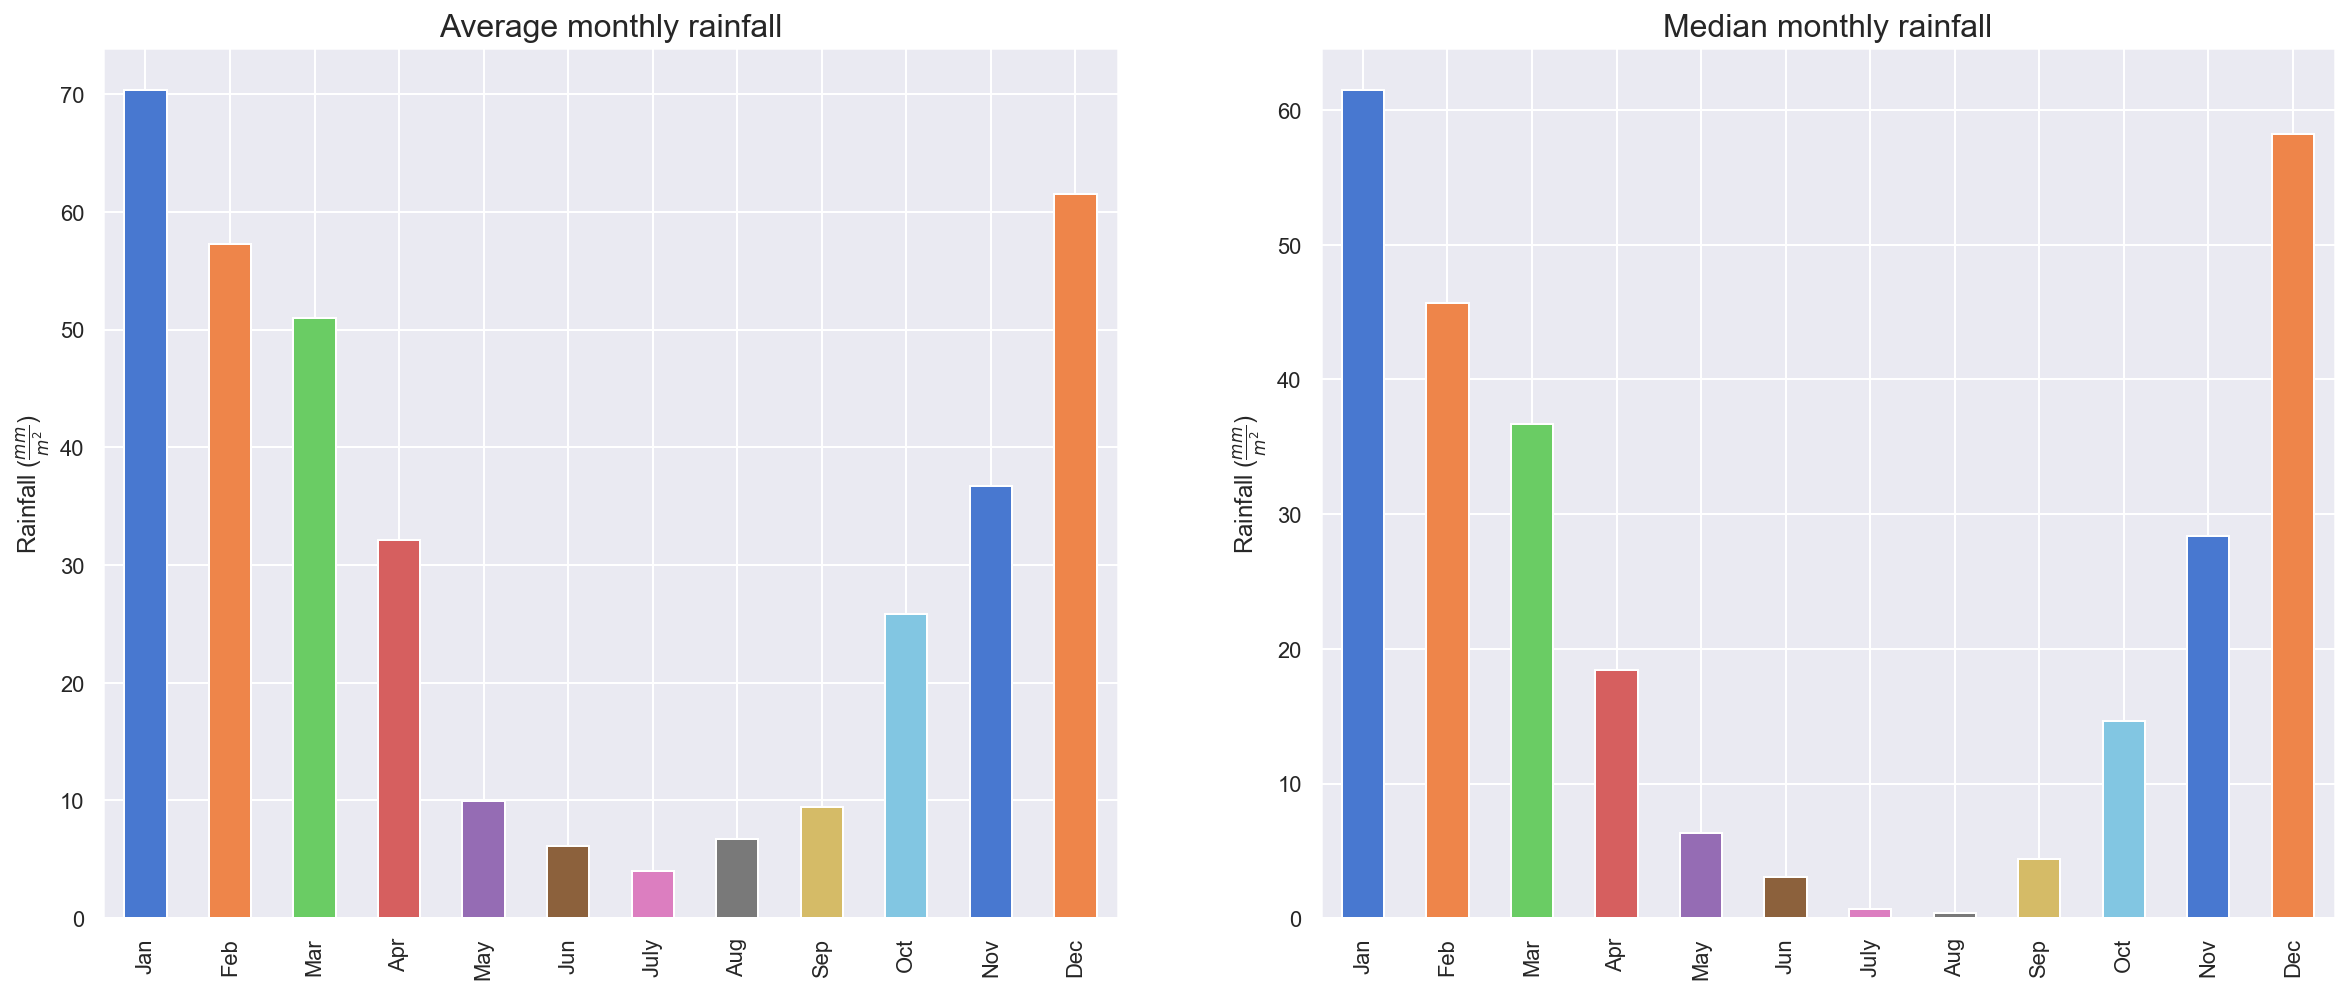

In [47]:
tucu_monthly_total['MONTH'] = tucu_monthly_total.index.month

monthly_averages = tucu_monthly_total.groupby('MONTH')['PRCP'].mean()
monthly_medians = tucu_monthly_total.groupby('MONTH')['PRCP'].median()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

monthly_averages.plot(kind='bar', color=sns.color_palette('muted'), ax=ax1)
ax1.set(xlabel='', ylabel='Rainfall ($\\frac{mm}{m^2}$)', xticklabels=month_names)
ax1.set_title('Average monthly rainfall', size=16);

monthly_medians.plot(kind='bar', color=sns.color_palette('muted'), ax=ax2)
ax2.set(xlabel='', ylabel='Rainfall ($\\frac{mm}{m^2}$)', xticklabels=month_names)
ax2.set_title('Median monthly rainfall', size=16);

Now the seasonality of the time series is evident: heavy rains in the summer, and low precipitation levels in the winter months.  

We will also perform an [STL](https://otexts.com/fpp2/stl.html) decomposition, to highlight the trend and seasonality of the series.

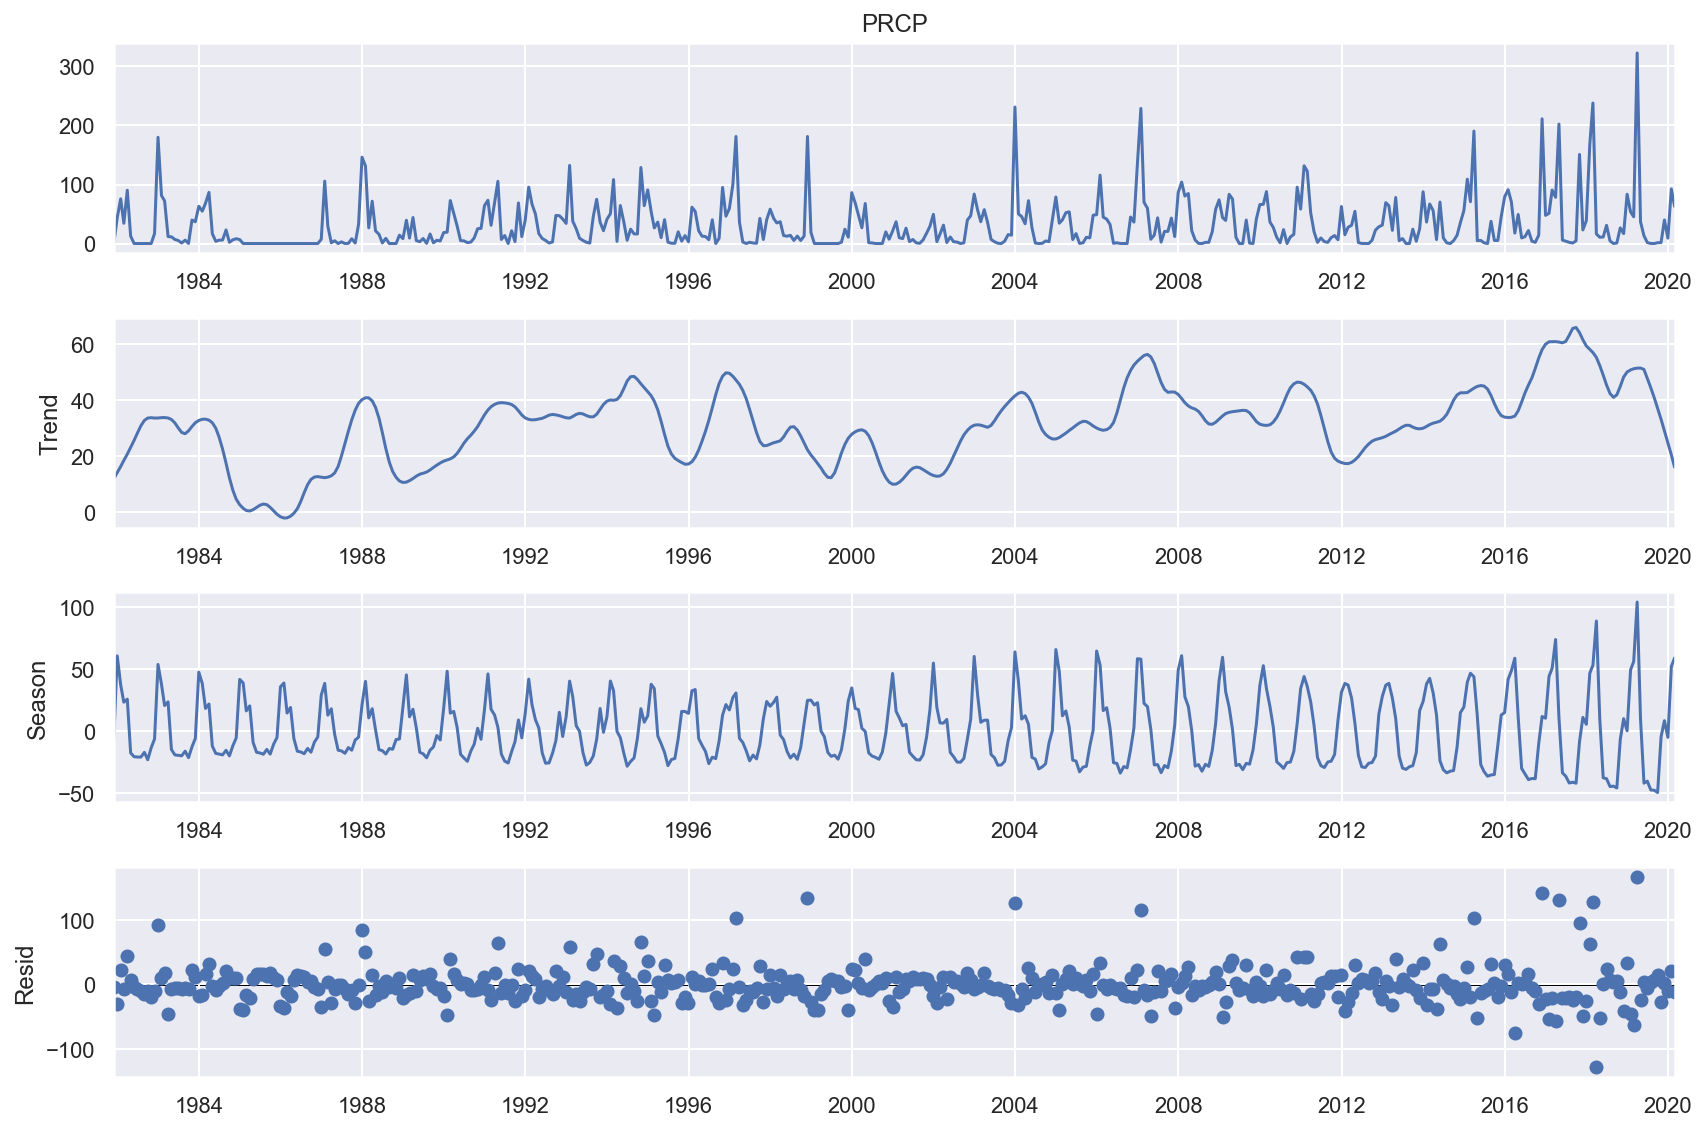

In [48]:
stl_decomposition = sm.tsa.STL(tucu_monthly_total['PRCP'], seasonal=13)
res = stl_decomposition.fit()
res.plot();

## Seasonality

### Wavelets

With the idea of seasonality in mind, we decompose the series in its seasonal component and the long term trend. To do so, we use the Discrete wavelet transform (DWT) in the Wavelet Transforms python module (*pywt*). Note that here we are applying this decomposition to the series of yearly maximum rainfall (i.e the series we are trying to predict), not to the supplementary dataset of daily rainfall.

In [76]:
dataset = stations_maxima['San Luis Tucuman'].dropna().values[:-1]

In [77]:
import pywt

In [78]:
(cA, cD) = pywt.dwt(dataset,'db1')

In [79]:
rain_long_trend = pywt.idwt(None,cD, 'db1', 'smooth')
rain_seasonal = pywt.idwt(cA, None, 'db1', 'smooth')

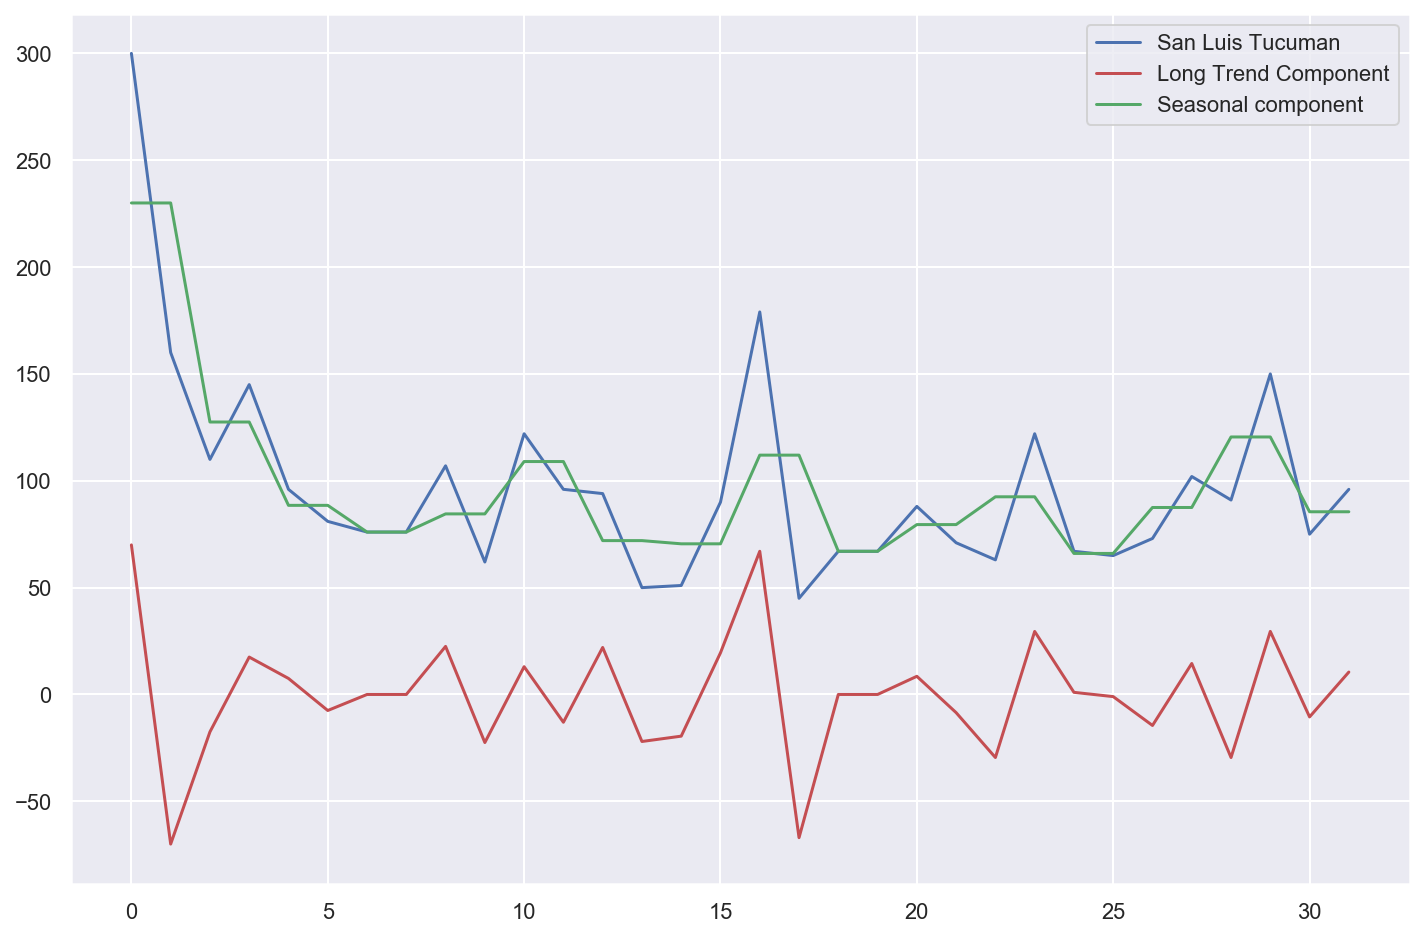

In [80]:
plt.plot(dataset,'-b', label='San Luis Tucuman' )
plt.plot(rain_long_trend, '-r', label='Long Trend Component')
plt.plot(rain_seasonal,'-g', label='Seasonal component')
plt.legend();

It's worth noting this decomposition is additive, that is, the original series is the sum of the seasonal and long term trend series.

### ARIMA Revisited

We then fit an **ARIMA model** to each component and predict the values for the next 10 years. We obtain the final forecast adding this two predicted series, as mentioned before.

In [81]:
stepwise_model = pmd.auto_arima(rain_seasonal, start_p=0, start_q=0,
                           max_p=0, max_q=1, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=241.282, BIC=244.816, Fit time=0.104 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=241.024, BIC=243.381, Fit time=0.008 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=242.922, BIC=246.456, Fit time=0.062 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=243.039, BIC=247.751, Fit time=0.107 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=241.836, BIC=246.548, Fit time=0.118 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=242.951, BIC=246.485, Fit time=0.034 seconds
Total fit time: 0.446 seconds


In [82]:
future_forecast_seasonal = stepwise_model.predict(n_periods=10)

In [83]:
stepwise_model = pmd.auto_arima(rain_long_trend, start_p=0, start_q=0,
                           max_p=3, max_q=3,
                           start_P=0, seasonal=True,
                           d=2, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds


ValueError: Could not successfully fit ARIMA to input data. It is likely your data is non-stationary. Please induce stationarity or try a different range of model order params. If your data is seasonal, check the period (m) of the data.

In [84]:
future_forecast_trend = stepwise_model.predict(n_periods=10)

In [85]:
future_forecast = future_forecast_trend + future_forecast_seasonal

In [88]:
rain_forecats = np.append(stations_maxima['San Luis Tucuman'].dropna().values[:-1], future_forecast)

We plot the dataset and the forecast obtained from the model.

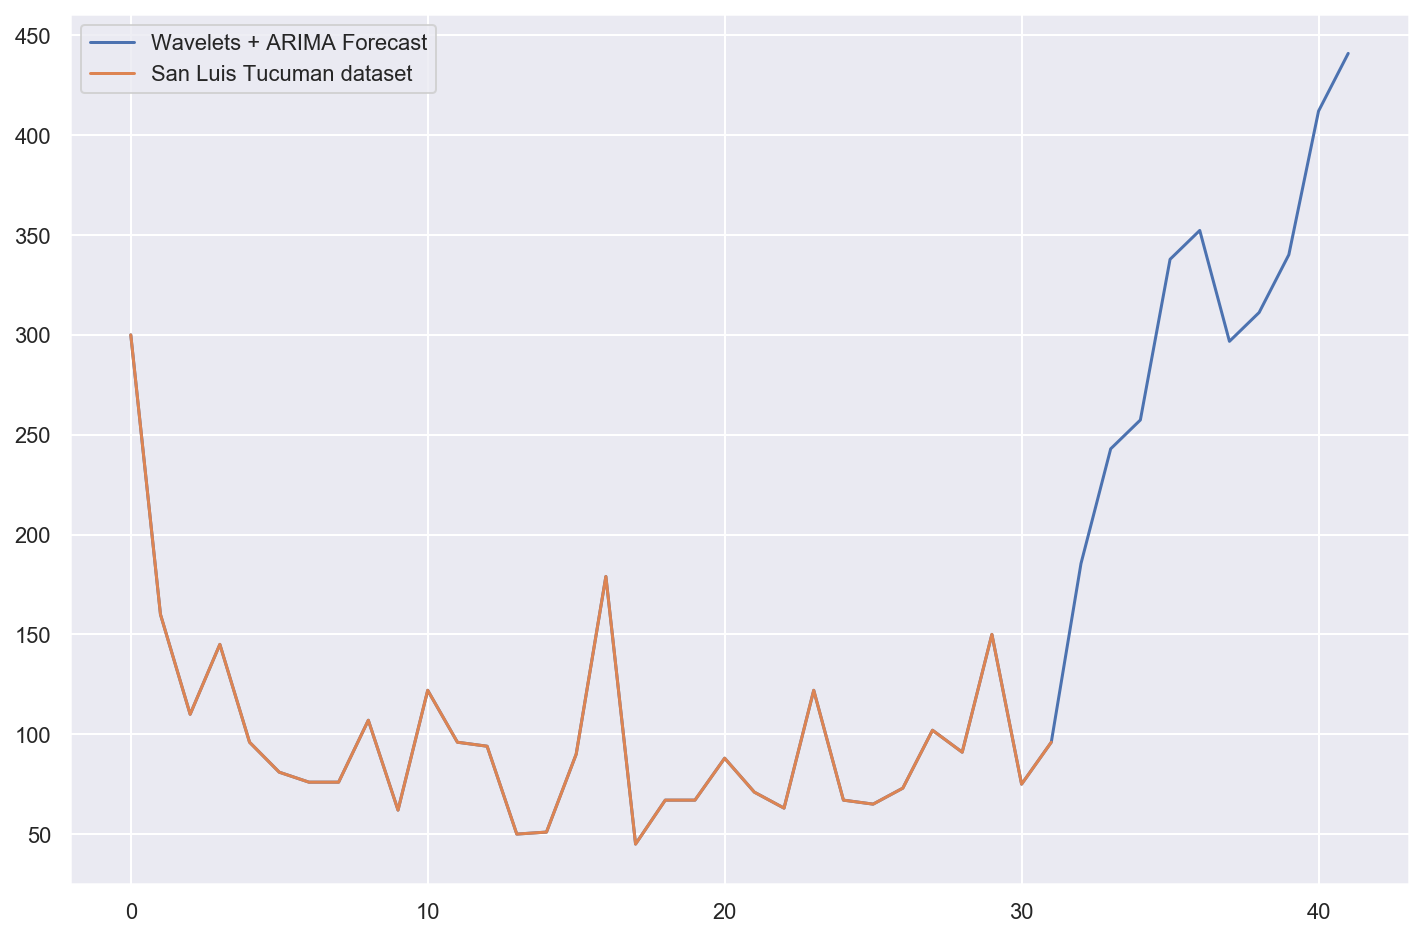

In [89]:
plt.plot(rain_forecats, label='Wavelets + ARIMA Forecast')
plt.plot(stations_maxima['San Luis Tucuman'].dropna().values[:-1], label='San Luis Tucuman dataset' )
plt.legend();

### LSTM

Next, instead of using an ARIMA model to fit the 2 time series obtained from the wavelet decomposition, we fit an **LSTM** to each one.

In [91]:
solutions_long_trend = {}
for i in range(20):
    dataset =rain_long_trend
    n_features = 1
    n_steps = 10
    X, y = split_sequence(dataset, n_steps)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=200, verbose=0)
    x_ = np.array(dataset[-10:])
    y = []
    for j in range(10):   
        x_input = x_.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        x_ = np.append(x_[1:],yhat)
        y.append(yhat)
    solutions_long_trend[i] = y


In [92]:
solutions_seasonal = {}
for i in range(20):
    dataset =rain_seasonal
    n_features = 1
    n_steps = 10
    X, y = split_sequence(dataset, n_steps)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=200, verbose=0)
    x_ = np.array(dataset[-10:])
    y = []
    for j in range(10):   
        x_input = x_.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        x_ = np.append(x_[1:],yhat)
        y.append(yhat)
    solutions_seasonal[i] = y


In [93]:
final_sol_seasonal = []
for i in range(10):
    mean = []
    for key in solutions_seasonal.keys():
        
        mean.append(solutions_seasonal[key][i][0][0])
    final_sol_seasonal.append(np.mean(mean))

In [94]:
final_sol_long_trend = []
for i in range(10):
    mean = []
    for key in solutions_long_trend.keys():
        
        mean.append(solutions_long_trend[key][i][0][0])
    final_sol_long_trend.append(np.mean(mean))

In [96]:
final_sol = [i+j for i,j in zip(final_sol_seasonal,final_sol_long_trend)]
rain_forecats = np.append(stations_maxima['San Luis Tucuman'].dropna().values[:-1], final_sol)

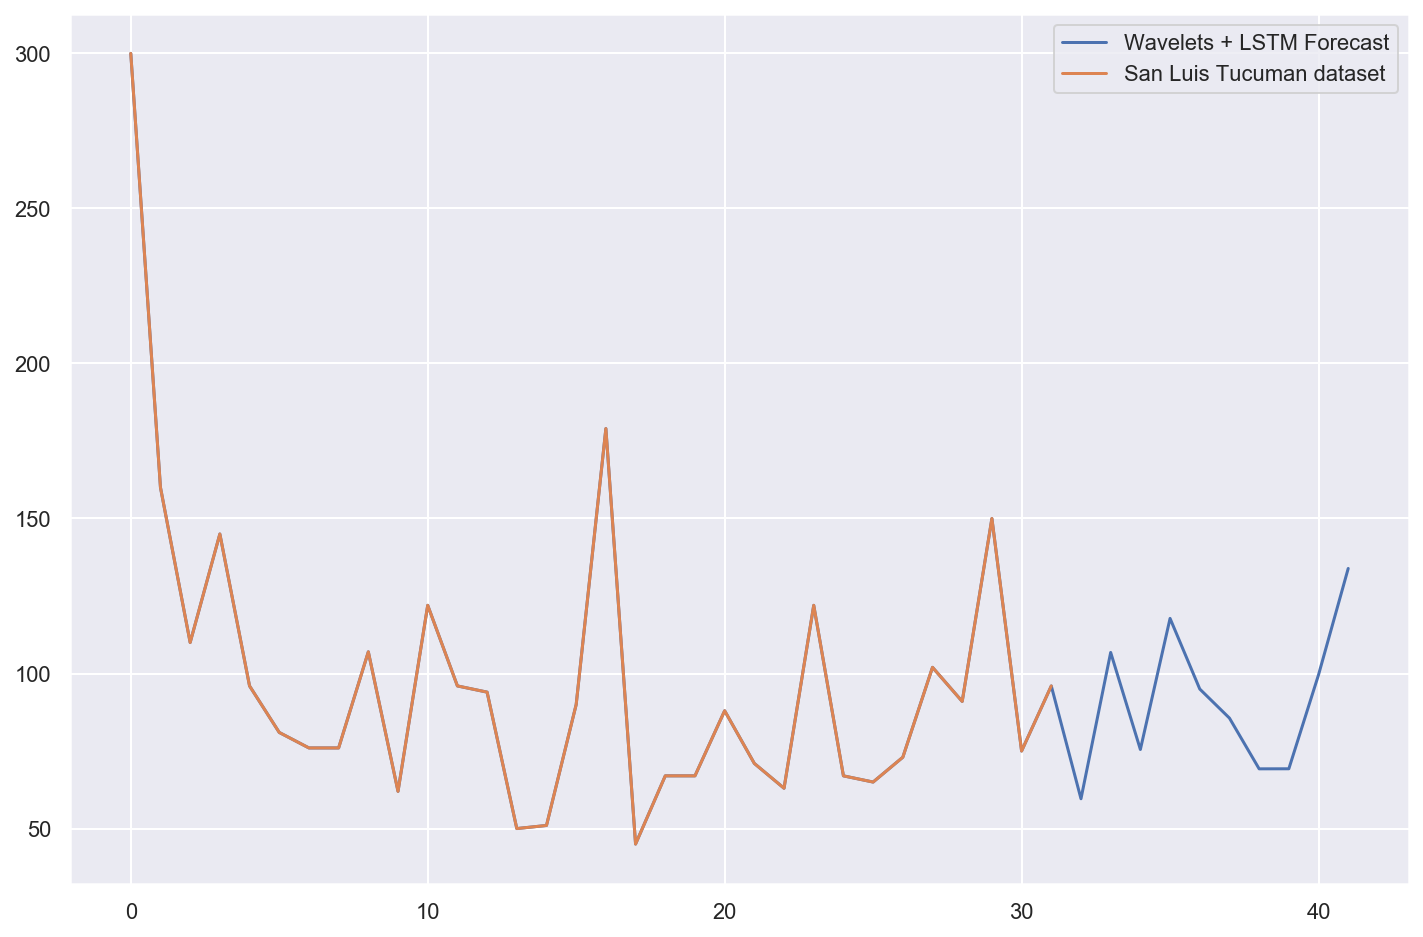

In [97]:
plt.plot(rain_forecats, label='Wavelets + LSTM Forecast')
plt.plot(stations_maxima['San Luis Tucuman'].dropna().values[:-1], label='San Luis Tucuman dataset' )
plt.legend();

## Distribution of daily rainfalls

After reviewing the scientific literature, we decided to try to fit a distribution to the daily rainfall data in order to determine yearly maxima.  
Several distributions have been analysed, with varying success depending on the location of the survey.

See:
- [Generation of daily amounts of precipitation from standard climatic data: a case study for Argentina](http://agrometeorologia.criba.edu.ar/Downloads/J-of-Hydrology.pdf) - Castellví, Mormeneo, Perez 2003
- [How extreme is extreme? An assessment of daily rainfall distribution tails](https://www.hydrol-earth-syst-sci.net/17/851/2013/) - Papalexiou, D. Koutsoyiannis, Makropoulos 2013
- [The Probability Distribution of Daily Precipitation at the Point and Catchment Scales in the United States](https://www.hydrol-earth-syst-sci.net/22/6519/2018/) - Ye1, Hanson, Ding, Wang, Voge 2018

First we will remove the years where we have less than 150 data points.

In [51]:
tucuman_airport['YEAR'] = tucuman_airport.index.year

lower_bound = 150
mask = tucuman_airport.resample('Y')['PRCP'].count() >= lower_bound
subset_years = tucuman_airport.resample('Y')['YEAR'].first()[mask]

filtered = tucuman_airport[tucuman_airport['YEAR'].isin(subset_years.values)]

Next, we will resample our data by month and take the maximum daily rainfall.

In [52]:
ϵ = 1E-6 # We add some small noise term in order to fit a distribution with pymc3

monthly_maxima = filtered.resample('M')['PRCP'].max()
monthly_maxima.fillna(value=0.0, inplace=True)
monthly_maxima += ϵ

### Weibul distribution

https://en.wikipedia.org/wiki/Weibull_distribution

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 28000/28000 [00:17<00:00, 1579.87draws/s]
logp = 532.38, ||grad|| = 4.2961: 100%|██████████| 16/16 [00:00<00:00, 1758.80it/s]  


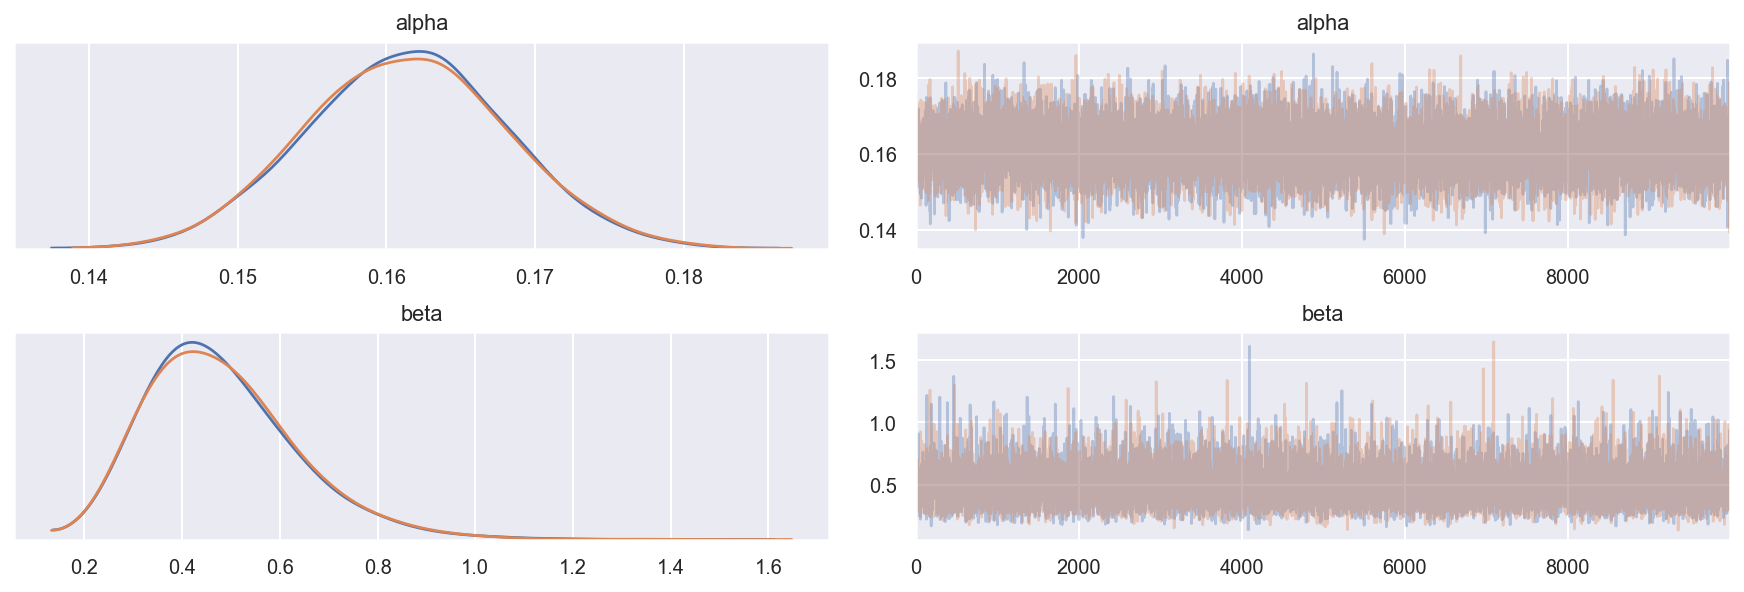

In [53]:
with pm.Model() as weibull_model:
    alpha = pm.HalfNormal('alpha')
    beta = pm.HalfNormal('beta')
    wb = pm.Weibull('rainfall', alpha, beta, observed=monthly_maxima)

    trace = pm.sample(10000, tune=4000, init='adapt_diag')
    map_wb = pm.find_MAP()

pm.traceplot(trace);

In [60]:
ppc = pm.sample_posterior_predictive(trace, model=weibull_model)

# We sample 10000 years (120000 months)
samples = ppc['rainfall'].flatten()[:120000]

year_samples = samples.reshape(10000, 12)
sample_maxima = year_samples.max(axis=1)

100%|██████████| 20000/20000 [00:07<00:00, 2717.13it/s]


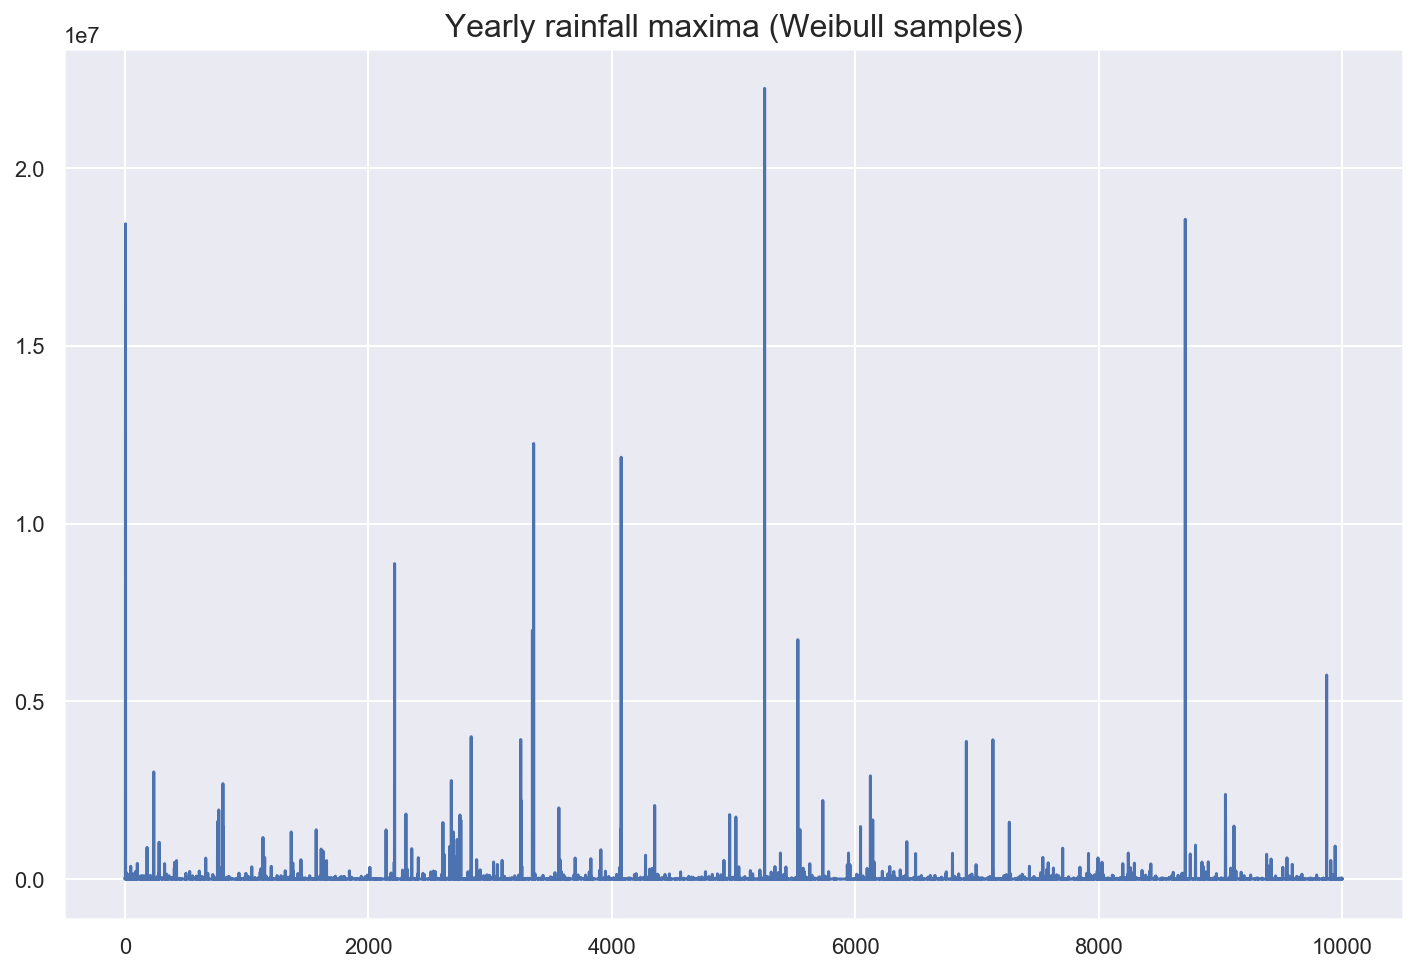

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Weibull distribution', size=20)

sns.scatterplot(x=np.arange(len(sample_maxima)), y=sample_maxima, alpha=0.6, ax=ax1)
ax1.set(xlabel='', ylabel='Rainfall ($\\frac{mm}{m^2}$)', xticklabels=month_names)
ax1.set_title('Maximum daily rainfall per year (samples)', size=16);

sns.distplot(sample_maxima, ax=ax2)
ax2.set(xlabel='', ylabel='Rainfall ($\\frac{mm}{m^2}$)', xticklabels=month_names)
ax2.set_title('Histogram of rainfall maxima', size=16);

In [62]:
sample_maxima.mean()

28600.019316022695

This distribution produces unreasonably large maxima forecasts.

### Gamma

https://en.wikipedia.org/wiki/Gamma_distribution

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 28000/28000 [00:15<00:00, 1768.37draws/s]
logp = 604.18, ||grad|| = 0.13959: 100%|██████████| 14/14 [00:00<00:00, 1939.37it/s]  


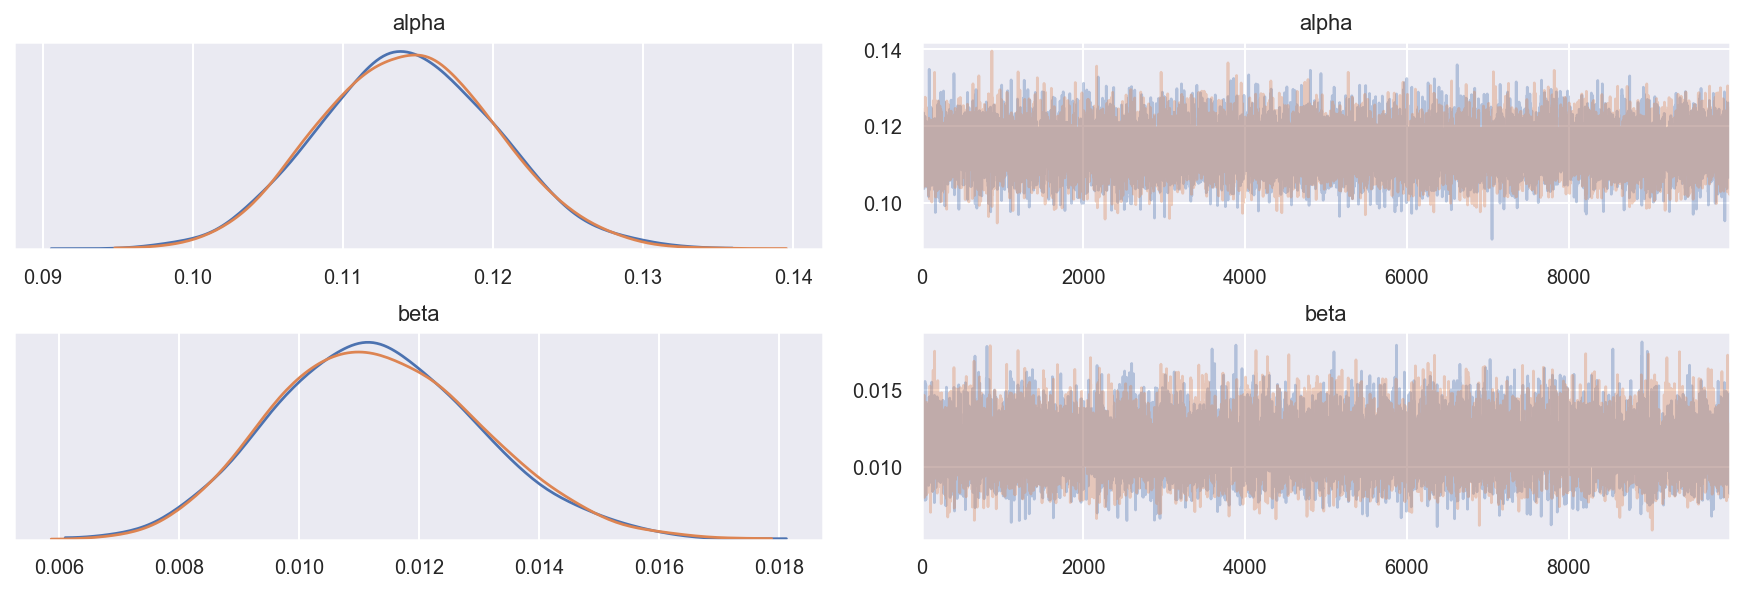

In [59]:
with pm.Model() as gamma_model:
    alpha = pm.HalfFlat('alpha')
    beta = pm.HalfFlat('beta')
    pareto = pm.Gamma('rainfall', alpha, beta, observed=monthly_maxima)

    trace = pm.sample(10000, tune=4000, init='adapt_diag')
    map_gamma = pm.find_MAP()

pm.traceplot(trace);

In [64]:
ppc = pm.sample_posterior_predictive(trace, model=gamma_model)

# We sample 10000 years (120000 months)
samples = ppc['rainfall'].flatten()[:120000]

year_samples = samples.reshape(10000, 12)
sample_maxima = year_samples.max(axis=1)

100%|██████████| 20000/20000 [00:10<00:00, 1966.10it/s]


In [66]:
sample_maxima.mean()

72.74759017040499

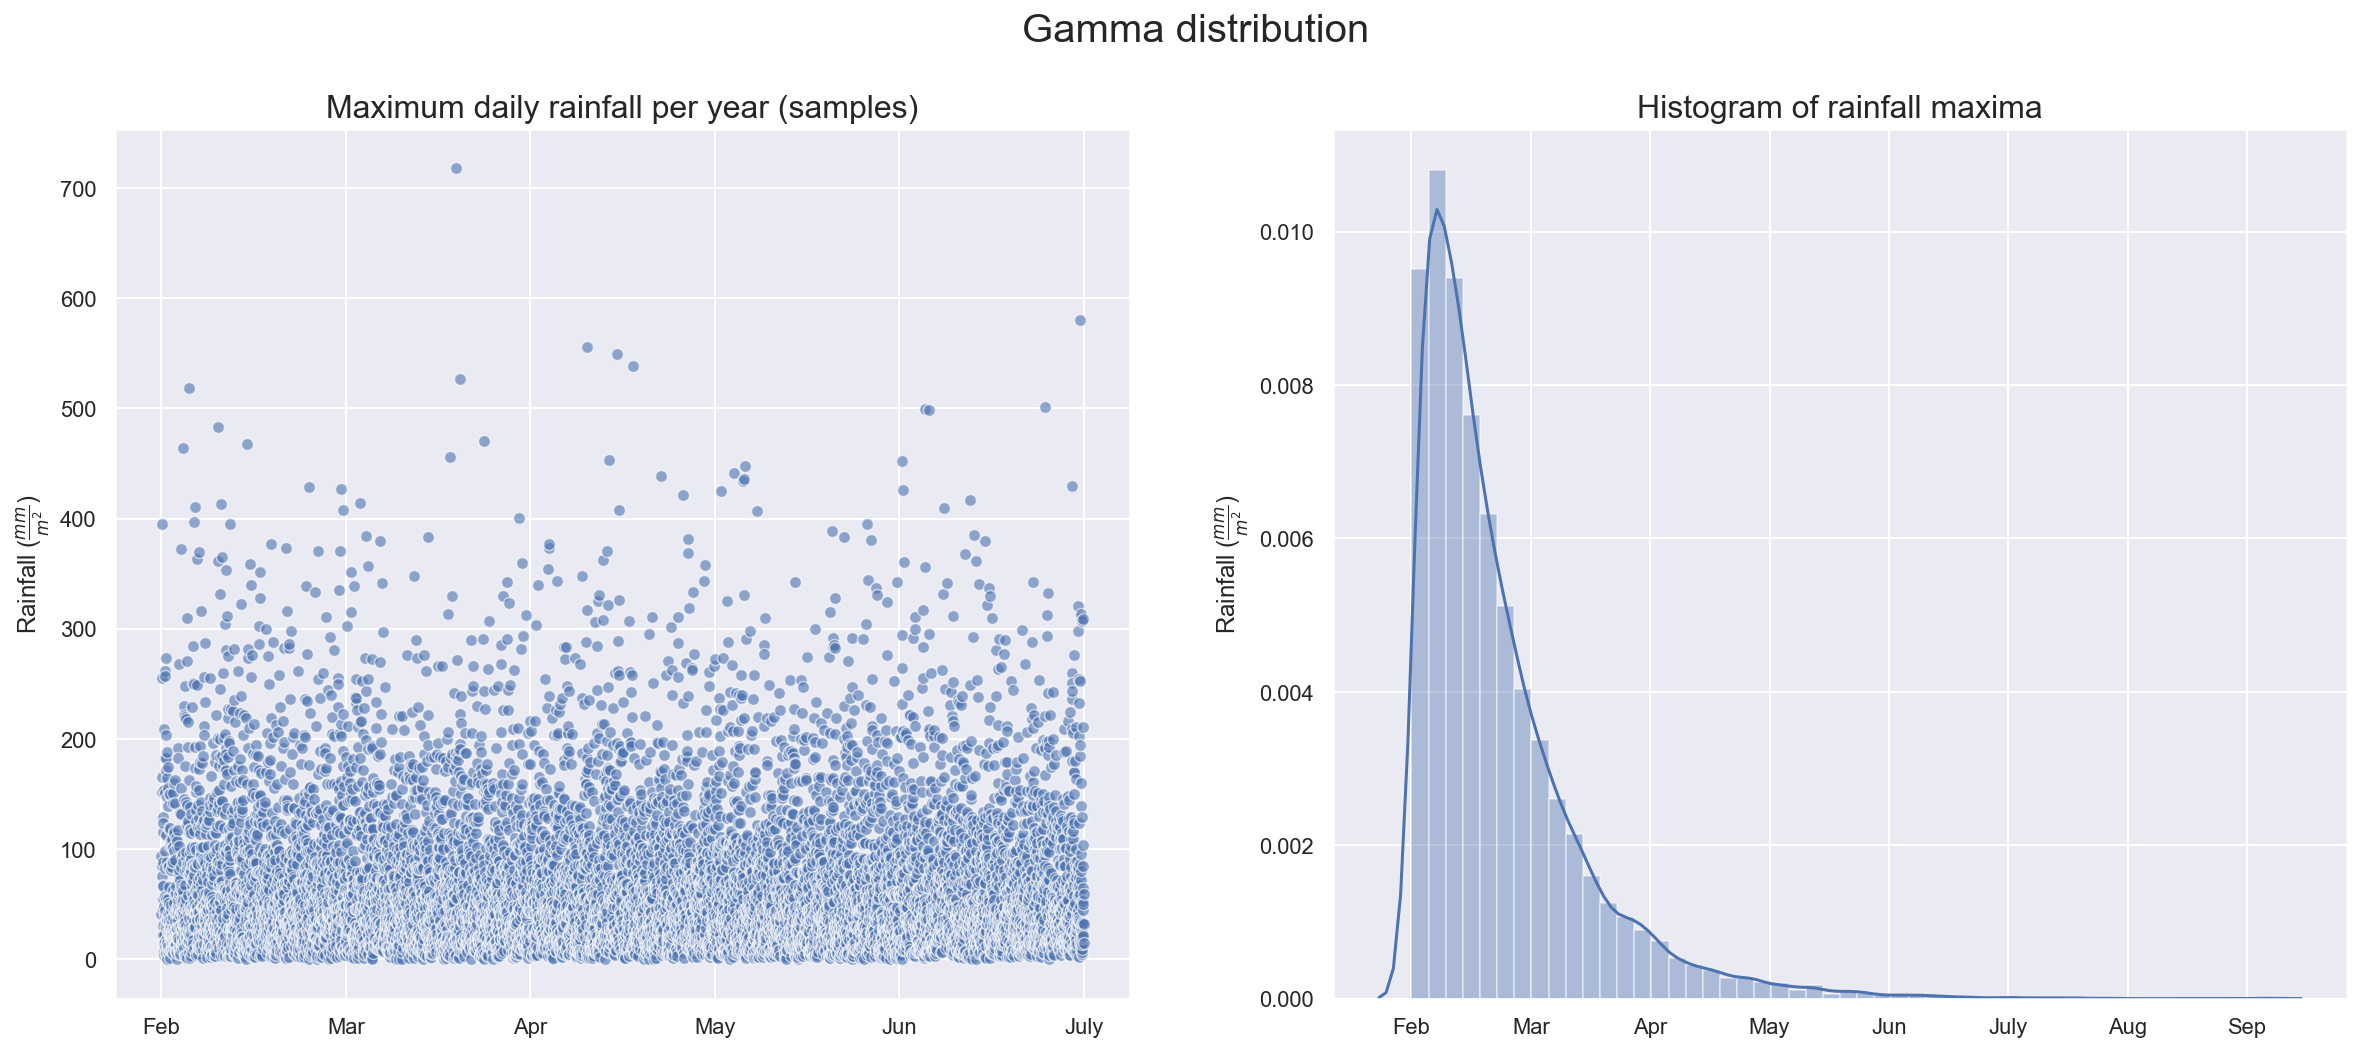

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Gamma distribution', size=20)

sns.scatterplot(x=np.arange(len(sample_maxima)), y=sample_maxima, alpha=0.6, ax=ax1)
ax1.set(xlabel='', ylabel='Rainfall ($\\frac{mm}{m^2}$)', xticklabels=month_names)
ax1.set_title('Maximum daily rainfall per year (samples)', size=16);

sns.distplot(sample_maxima, ax=ax2)
ax2.set(xlabel='', ylabel='Rainfall ($\\frac{mm}{m^2}$)', xticklabels=month_names)
ax2.set_title('Histogram of rainfall maxima', size=16);

We found this distribution to be a better fit for our data. However, when we tested with the online grader we recieved a $MAE$ score > 35.

### Gumbel distribution

https://en.wikipedia.org/wiki/Gumbel_distribution

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, mu]
Sampling 2 chains, 0 divergences: 100%|██████████| 28000/28000 [00:18<00:00, 1514.85draws/s]
logp = -1,735.1, ||grad|| = 70.02: 100%|██████████| 17/17 [00:00<00:00, 1867.70it/s]  


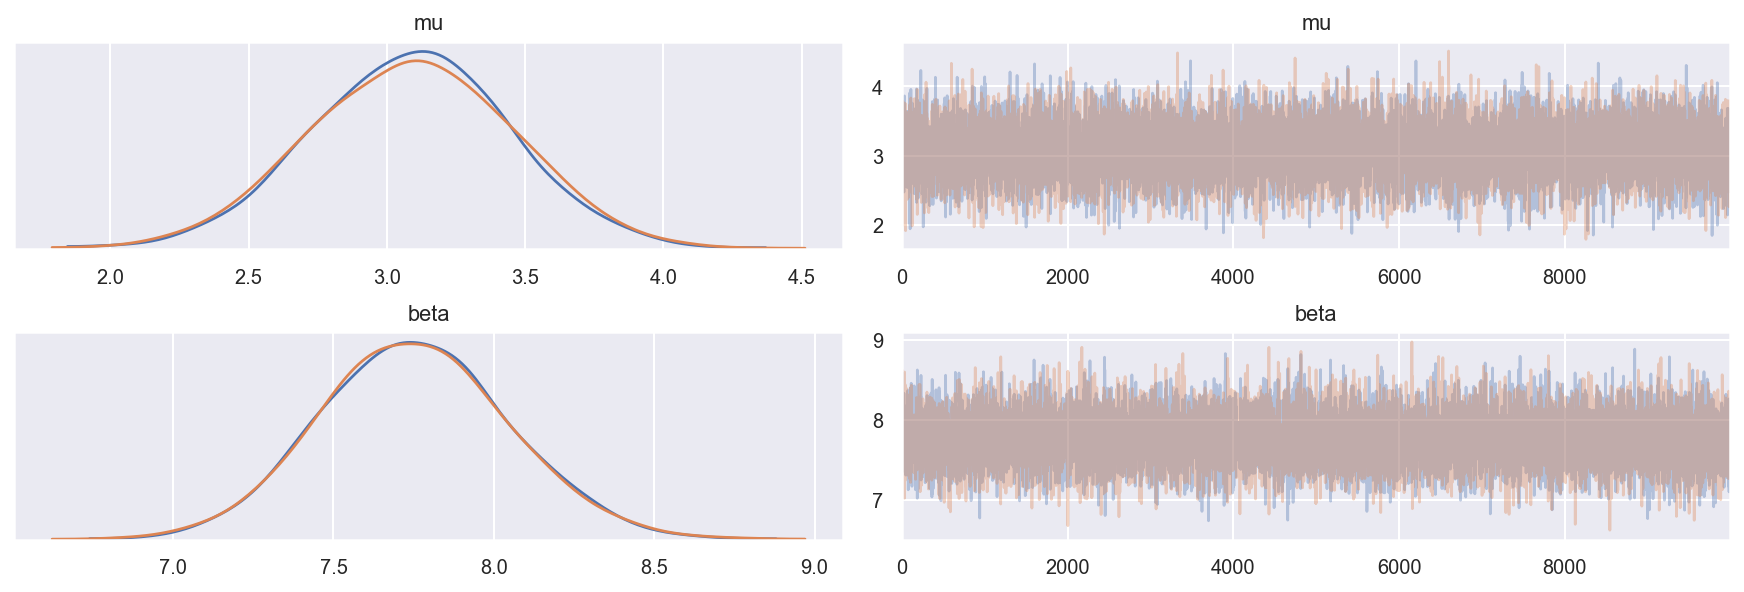

In [70]:
with pm.Model() as gumbel_model:
    mu = pm.Normal('mu')
    beta = pm.HalfNormal('beta')
    gumbel = pm.Gumbel('rainfall', mu, beta, observed=monthly_maxima)

    trace = pm.sample(10000, tune=4000, init='adapt_diag')
    map_gumbel = pm.find_MAP()

pm.traceplot(trace);

In [71]:
ppc = pm.sample_posterior_predictive(trace, model=gumbel_model)

# We sample 10000 years (120000 months)
samples = ppc['rainfall'].flatten()[:120000]

year_samples = samples.reshape(10000, 12)
sample_maxima = year_samples.max(axis=1)

100%|██████████| 20000/20000 [00:09<00:00, 2101.96it/s]


In [72]:
sample_maxima.mean()

26.903146219362203

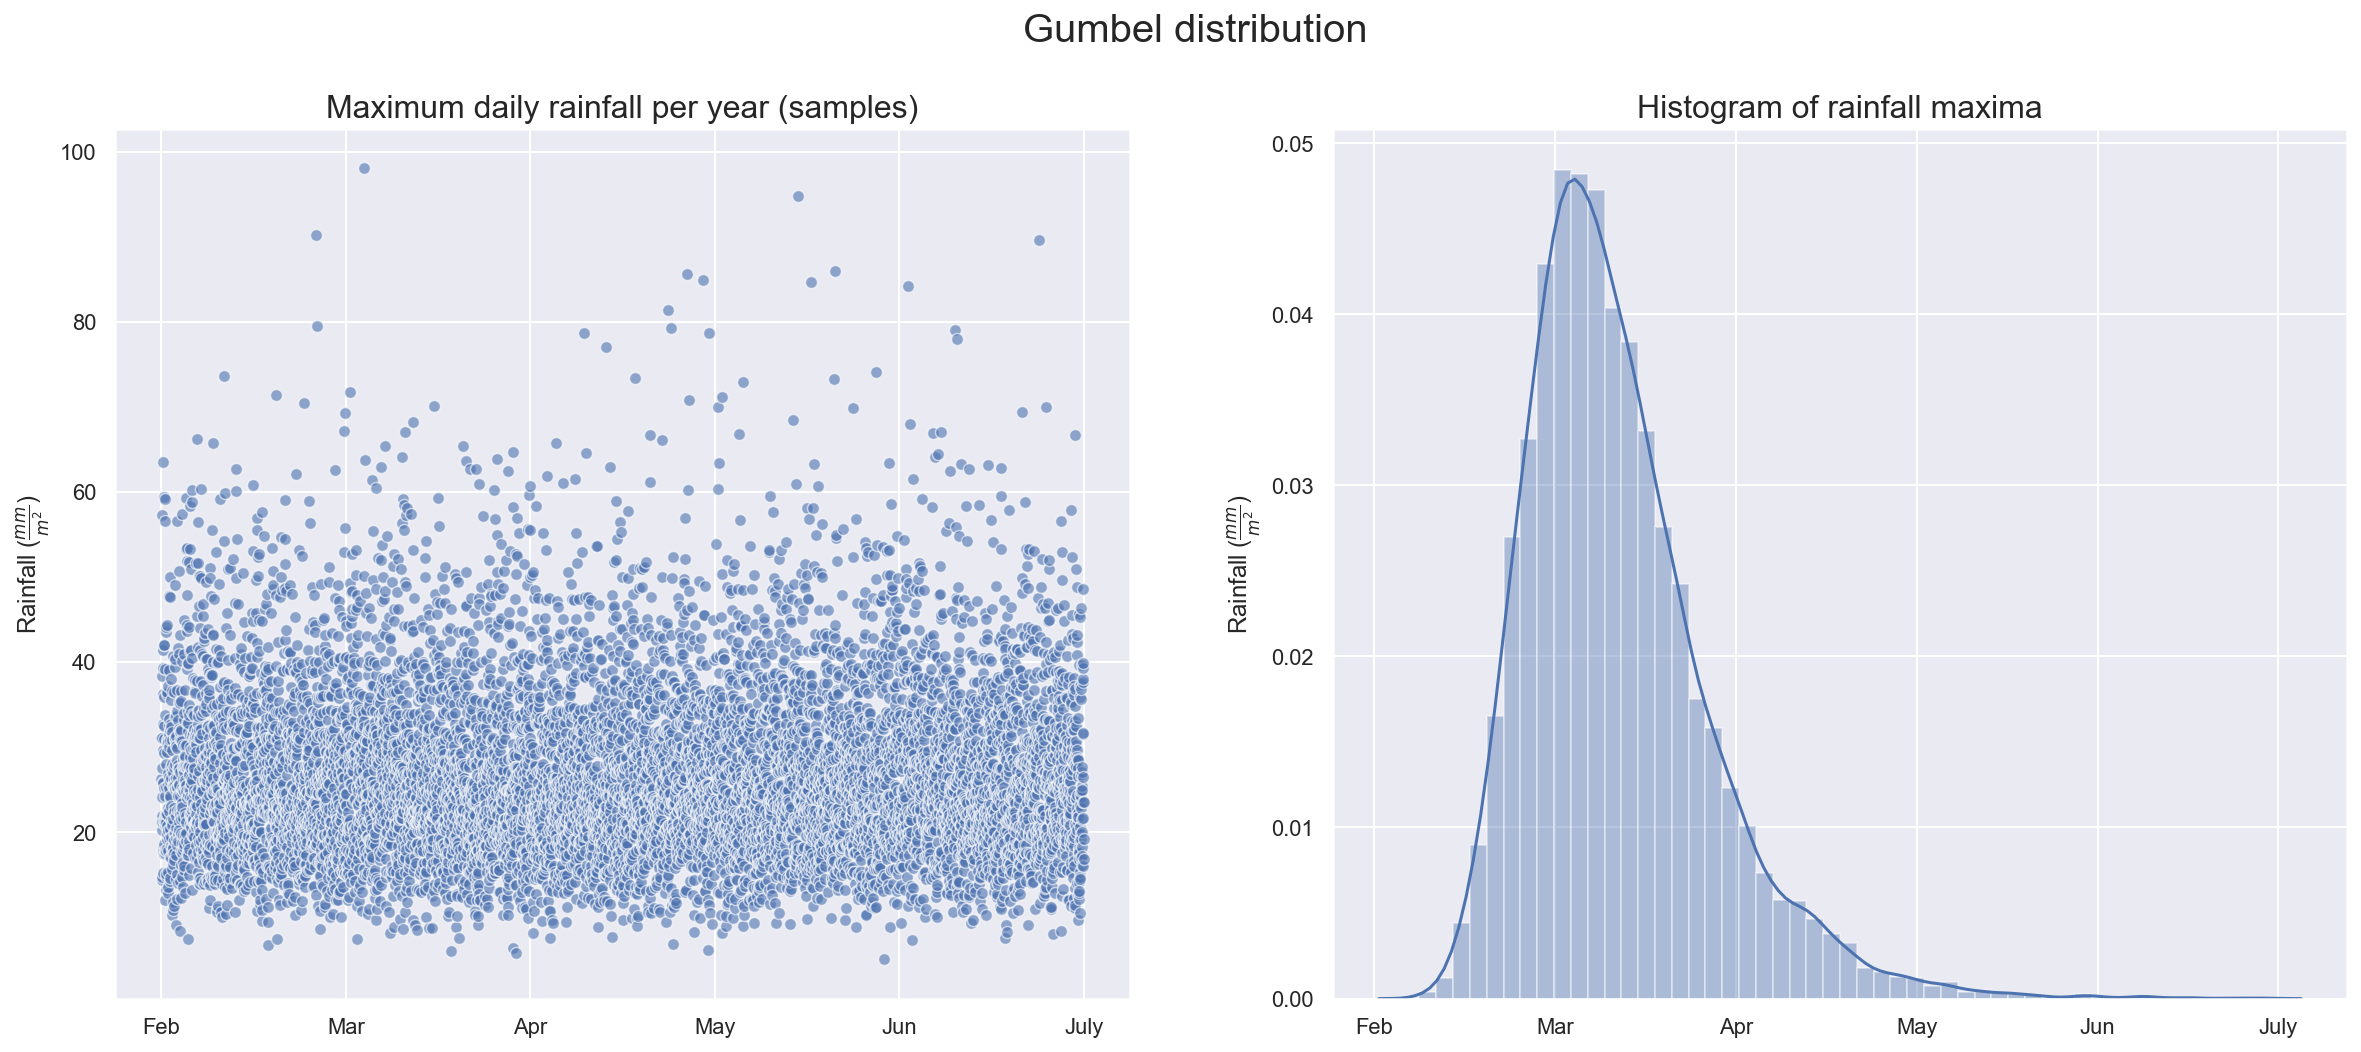

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Gumbel distribution', size=20)

sns.scatterplot(x=np.arange(len(sample_maxima)), y=sample_maxima, alpha=0.6, ax=ax1)
ax1.set(xlabel='', ylabel='Rainfall ($\\frac{mm}{m^2}$)', xticklabels=month_names)
ax1.set_title('Maximum daily rainfall per year (samples)', size=16);

sns.distplot(sample_maxima, ax=ax2)
ax2.set(xlabel='', ylabel='Rainfall ($\\frac{mm}{m^2}$)', xticklabels=month_names)
ax2.set_title('Histogram of rainfall maxima', size=16);

The Gumbel distribution produced thinner tails, with a mean maximum rainfall estimates of 26.9.